# Micro Credit Loan Case Study 

Problem Statement: - 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 
Exercise:
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

Micro Credict Loan Case Study Data Description: - 

from above we can see the data description and the problem statement of the data lets now import all the essentianl python libraries so we can perfroms task on the dataset

In [1]:
import pandas as pd 
import numpy as np
from numpy import percentile
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore, boxcox, yeojohnson
from collections import Counter
from sklearn.preprocessing import power_transform, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc, roc_auc_score,roc_curve, f1_score, precision_score, recall_score
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
%matplotlib inline

from above we can see that we have imported all the neccessary python libraries and now let us import the dataset using pandas.read_csv() method

lets us import the data using pandas.read_csv() and save it in our variable ds

In [2]:
ds = pd.read_csv("~/Desktop/FlipRobo Technologies/Micro Credit Project/Data file.csv")

from above we can see that we have imported our dataset in our local variable ds and now let us look at the data using ds.head() it will give us the first 5 rows of the data and all the column names

In [3]:
ds.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

from above we can see that the dataset is a mixture of object, float64 and int64 datatype in which float64 datatype is maximum 

from above we can't see all the columns so lets now use pd.set_options to see all the column names

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
ds.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

from above we can now see that we can display all the columns

lets now look at ds.info() for more information about the dataset

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

from above given information we can say that there are total 37 columns and the row count is 209592

there are 21 columns with datatype as float64, 13 columns as int64 and 3 of them are object

from above we can see that there are no missing values in the data so let us check it using ds.isnull().sum()

In [7]:
ds.isnull().count() - ds.shape[0]

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

from above we can see that there are 0 missing values in the dataset we can also check the null values using ds.isnull().sum()

In [8]:
ds.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

lets us check how does none missing values look using heatmap

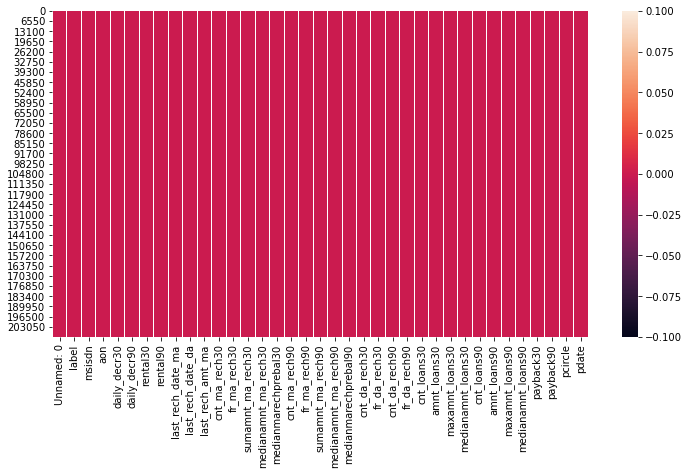

In [9]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.isnull())

from above we can see that the heatmap has only one color so this is how No missing values dataset look like lets now check the shape of the data

In [10]:
r, c = ds.shape
print("Number of Rows are {} and Columns are {}".format(r, c))

Number of Rows are 209593 and Columns are 37


from above we can see that there are 209593 rows and 37 columns

lets see the value counts of all the columns using value_counts()

In [11]:
pd.set_option('display.max_rows',100)

In [12]:
for i in ds.columns:
    print(ds[i].value_counts())
    print('\n')

2047      1
41537     1
62027     1
64074     1
57929     1
         ..
105881    1
103832    1
126359    1
124310    1
2049      1
Name: Unnamed: 0, Length: 209593, dtype: int64


1    183431
0     26162
Name: label, dtype: int64


04581I85330    7
47819I90840    7
22038I88658    6
71742I90843    6
42825I88688    6
              ..
72840I90847    1
98381I89233    1
05452I88680    1
21086I88650    1
36256I90580    1
Name: msisdn, Length: 186243, dtype: int64


95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
752400.263562      1
565434.285440      1
931525.183027      1
929670.835962      1
972326.532821      1
Name: aon, Length: 4507, dtype: int64


0.000000       4144
500.000000      829
1000.000000     569
700.000000      381
600.000000      354
               ... 
3565.333333       1
596.172000        1
700.126667        1
7604.514667       1
4108.476000       1
Name: daily_decr30, Length: 147026, dtype: i

lets see some discriptive stastics for data using ds.describe()

In [13]:
ds.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  \
count      209593.000000     209593.000000  209593.000000  209593.000000   
mean         3712.202921       2064.452797       3.978057    3737.355121   
std         53374.833430       2370.786034       4.256090   53643.625172   
min           -29.000000          0.000000       0.000000       0.000000   
25%             0.000000        770.000000       1.000000       0.000000   
50%             0.000000       1539.000000       3.000000       2.000000   
75%             0.000000       2309.000000       5.000000       6.000000   
max        999171.809410      55000.000000     203.000000  999606.368132   

       sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
count      209593.000000         209593.000000         209593.000000   
mean         7704.501157           1812.817952           3851.927942   
std         10139.621714           2070.864620          54006.374433   
min             0.000000              0.000000           -200.000000   
25%          1540.000000            770.000000             11.000000   
50%          4628.000000           1539.000000             33.900000   
75%         10010.000000           1924.000000             83.000000   
max        810096.000000          55000.000000         999479.419319   

       cnt_ma_rech90   fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count   209593.00000  209593.000000      209593.000000         209593.000000   
mean         6.31543       7.716780       12396.218352           1864.595821   
std          7.19347      12.590251       16857.793882           2081.680664   
min          0.00000       0.000000           0.000000              0.000000   
25%          2.00000       0.000000        2317.000000            773.000000   
50%          4.00000       2.000000        7226.000000           1539.000000   
75%          8.00000       8.000000       16000.000000           1924.000000   
max        336.00000      88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.0

from above we can see the stastics about the dataset lets look the same using heatmap to understand the columns more

In [14]:
ds.drop('Unnamed: 0', 1, inplace = True)

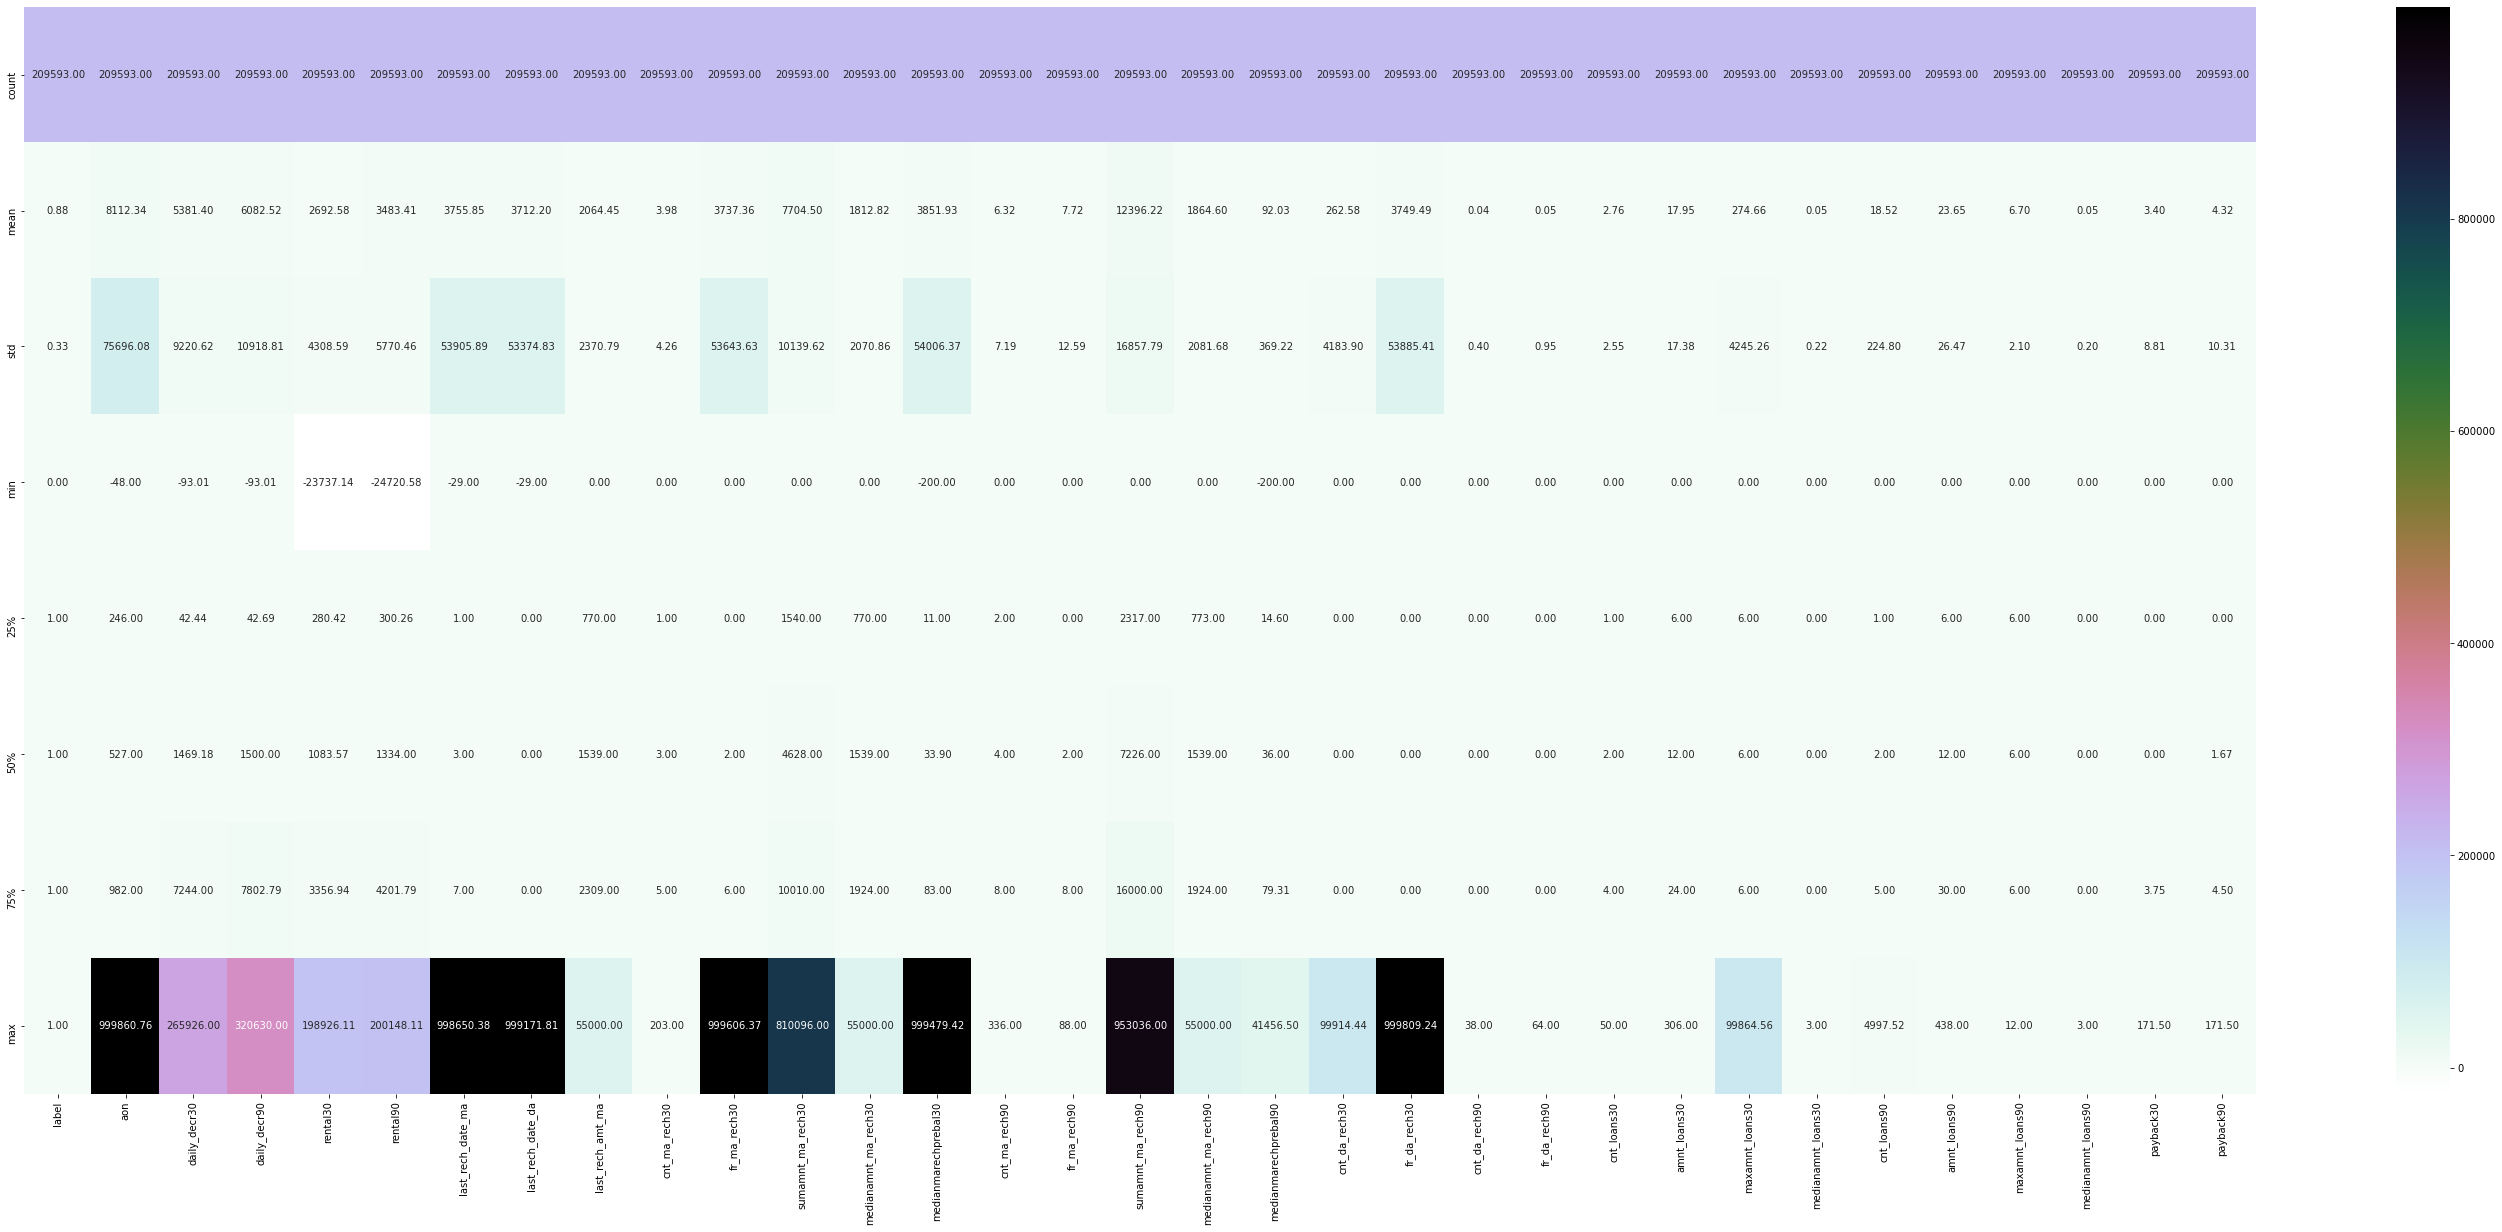

In [15]:
plt.figure(figsize = (50,20))
sns.heatmap(ds.describe(), annot=True, fmt='.2f',cmap='cubehelix_r')

from above graph we can see some huge values in some of the column they can bee outliers we will fix them in Data Prepoecessing step

we can also drop pcircle as there is only 1 category and we can also drop the msisdn as phone number dosen't decide the user will pay the loan or not and we will drop date column too.

In [16]:
ds.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [17]:
ds.drop(['msisdn','pcircle','pdate'],1,inplace=True)

In [18]:
ds.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333

now we have all the values that are needed to build and predict defaulter or non defaulter person from the dataset

## EDA Process

In [19]:
ds.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333

from above graph we can see that daily_decr30 has some values which are far away from the cluster of points so that points can bee outliers

In [20]:
def uni(c):
    plt.figure(figsize = (12,6))
    sns.scatterplot(ds.index, ds[c], color='r', alpha=0.3)
    plt.grid()

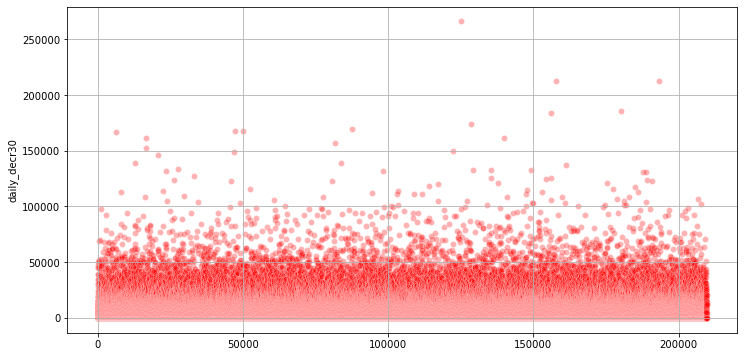

In [21]:
uni('daily_decr30')

from above graph we can say that there are some points whose are away from the cluster of points beneath them these far away points can be outliers

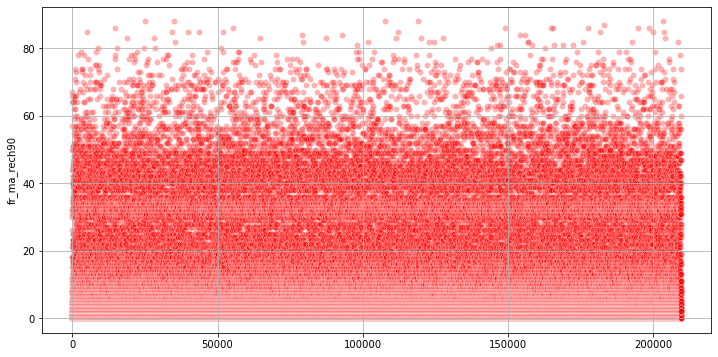

In [22]:
uni('fr_ma_rech90')

from above we can see that Frequency of main account recharged in last 90 days is evenly distributed

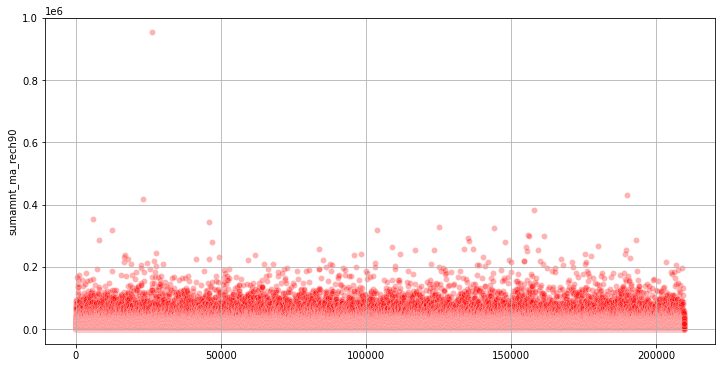

In [23]:
uni('sumamnt_ma_rech90')

there are some outliers in the datset too

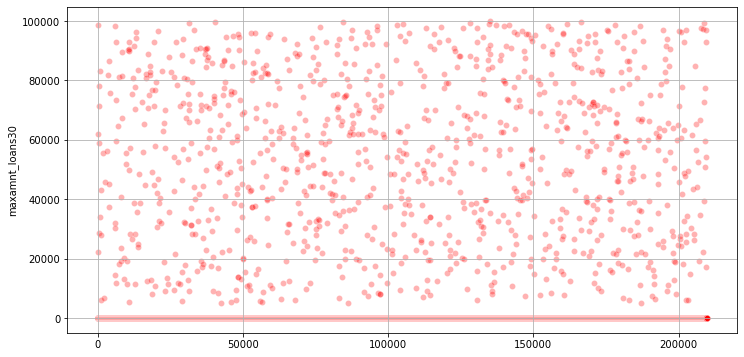

In [24]:
uni('maxamnt_loans30')

maximum amount of loan taken by the user in last 30 days is evenly distributed

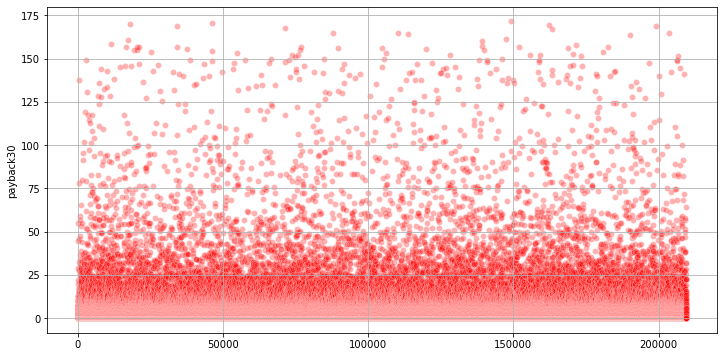

In [25]:
uni('payback30')

from above we can see the distribution of Average Payback time in days over last 30 days

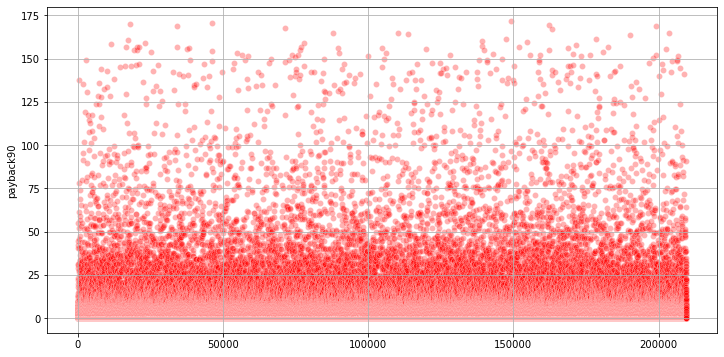

In [26]:
uni('payback90')

Avarage payback time in days over last 90 days is also evenly spreaded

In [27]:
ds.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333

<Figure size 2160x1080 with 0 Axes>

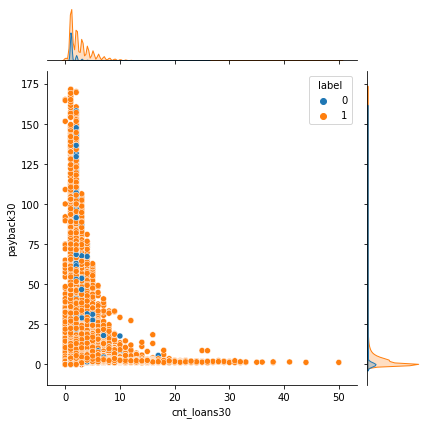

In [28]:
plt.figure(figsize = (30,15))
sns.jointplot('cnt_loans30', 'payback30', hue='label', data = ds)

from above we can see the jointplot of payback30 and cnt_loans 30 with respect to defaulter and not defaulter

<Figure size 864x432 with 0 Axes>

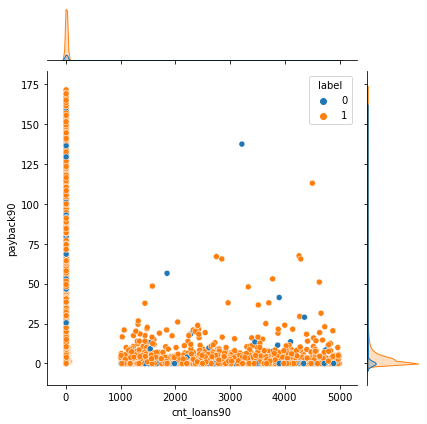

In [29]:
plt.figure(figsize = (12,6))
sns.jointplot('cnt_loans90', 'payback90', hue='label', data = ds)

in 90 days loans people take more time to pay the loan

<Figure size 864x432 with 0 Axes>

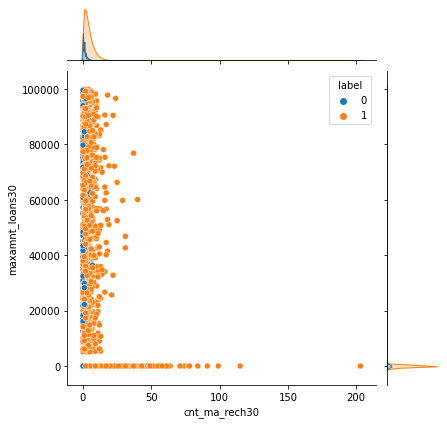

In [30]:
plt.figure(figsize = (12,6))
sns.jointplot('cnt_ma_rech30', 'maxamnt_loans30', hue='label', data = ds)

from above we can see the relation between no of times main account recharge in 30 days vs maximum loan taken by user in 30 days

<Figure size 864x432 with 0 Axes>

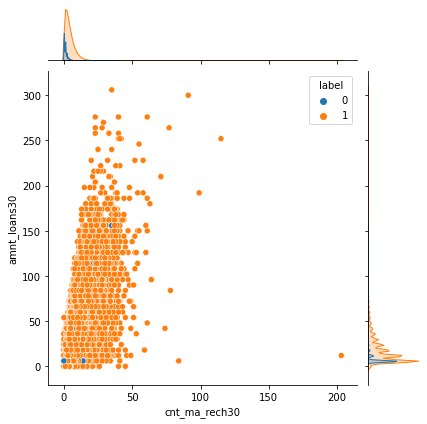

In [31]:
plt.figure(figsize = (12,6))
sns.jointplot('cnt_ma_rech30', 'amnt_loans30', hue='label', data = ds)

from above we can see the relation between Number of times main account recharged vs total amount of loan taken in 30 days

<Figure size 864x432 with 0 Axes>

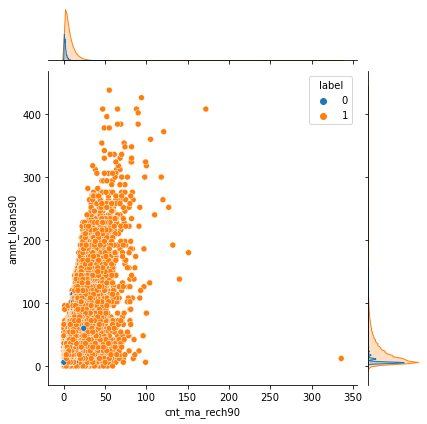

In [32]:
plt.figure(figsize = (12,6))
sns.jointplot('cnt_ma_rech90', 'amnt_loans90', hue='label', data = ds)

from above we can see the relation between Number of times main account recharged vs total amount of loan taken in 90 days

<Figure size 864x432 with 0 Axes>

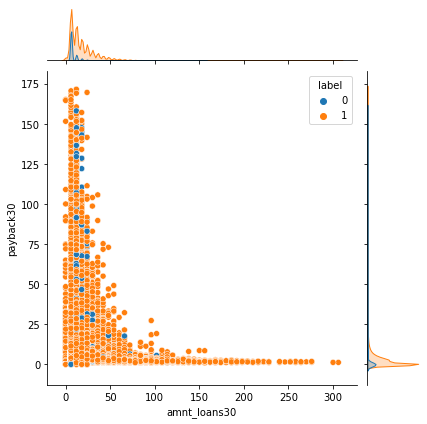

In [33]:
plt.figure(figsize = (12,6))
sns.jointplot('amnt_loans30', 'payback30', hue='label', data = ds)

Total amount of loans taken vs average payback time in 30 days

<Figure size 864x432 with 0 Axes>

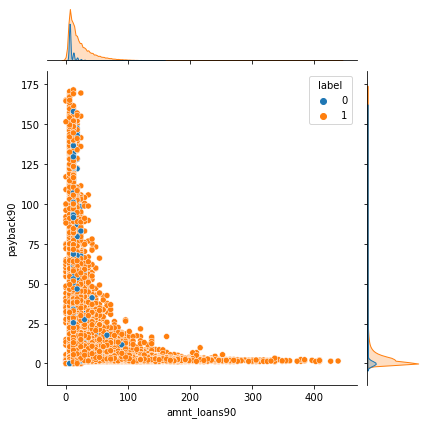

In [34]:
plt.figure(figsize = (12,6))
sns.jointplot('amnt_loans90', 'payback90', hue='label', data = ds)

Total amount of loans taken vs average payback time in 90 days

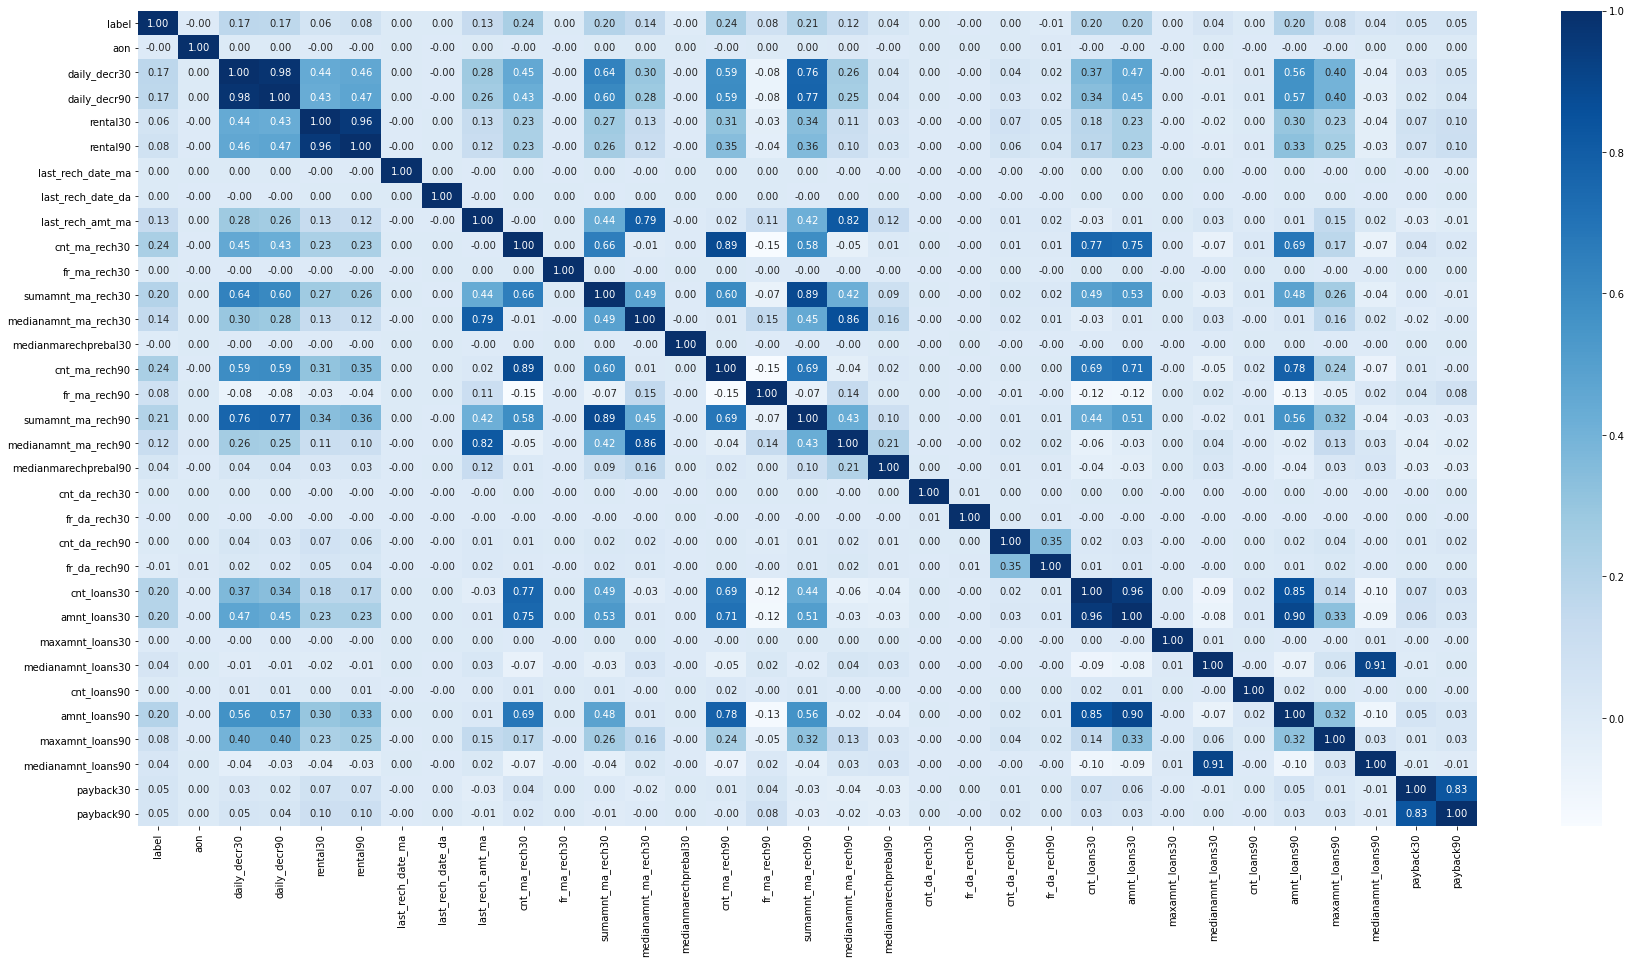

In [35]:
plt.figure(figsize = (30,15))
sns.heatmap(ds.corr(), annot=True, fmt='.2f', cmap='Blues')

from above we can see the correlation of the dataset, darker the area more is the correlation between the columns

lets now find the outliers and the skewness of data using ds.skew and zscore method first we will remove the outliers

if the total data loss is above 8% we will not remove the outliers 

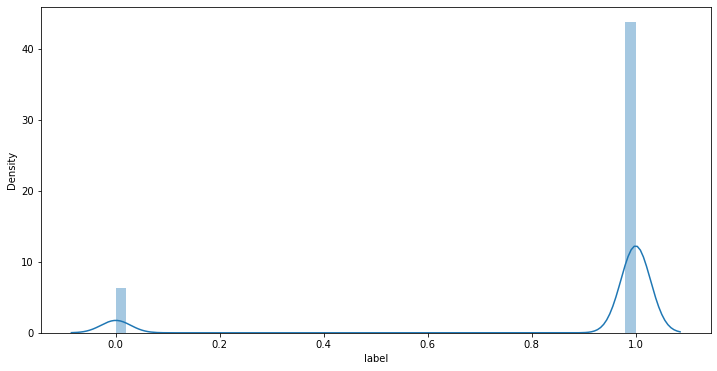

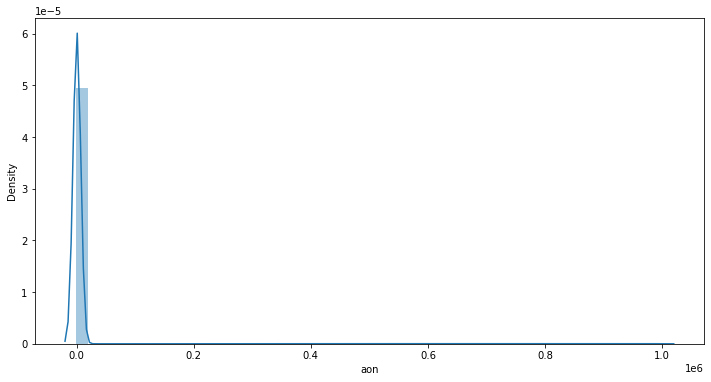

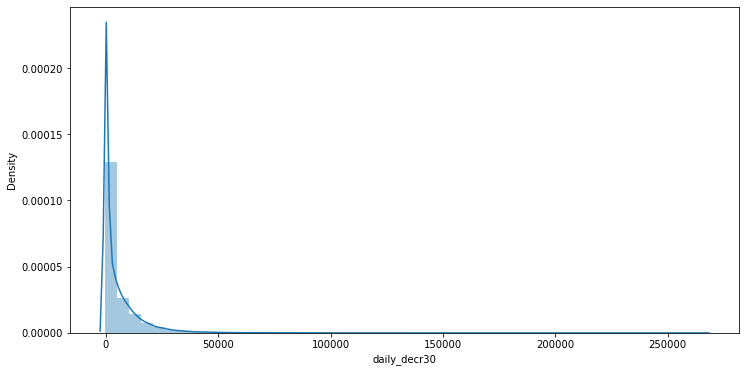

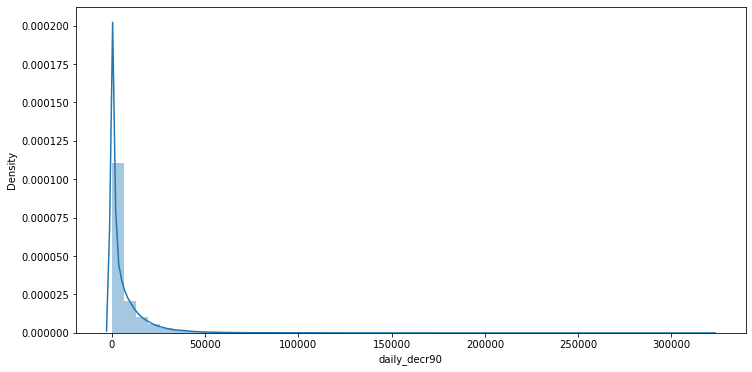

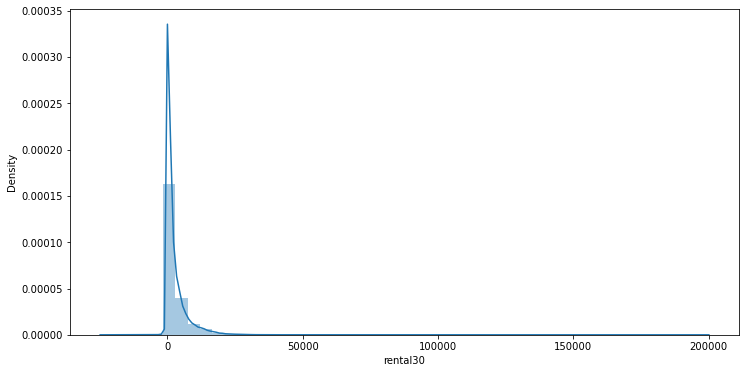

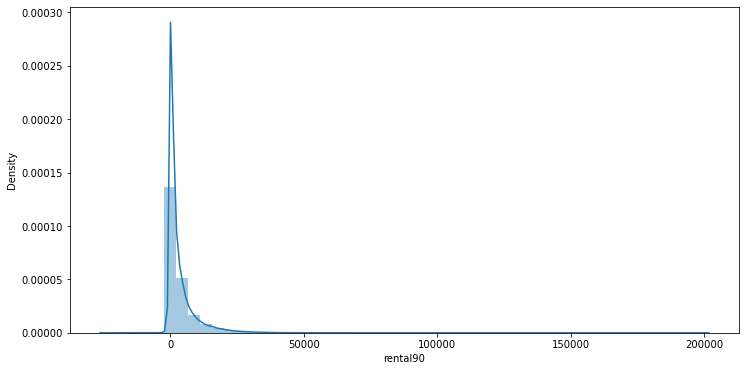

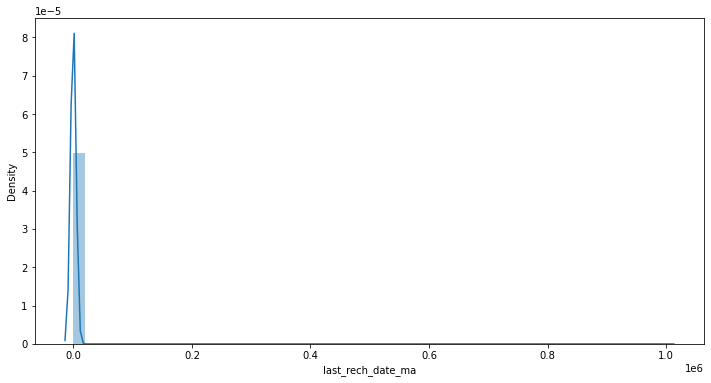

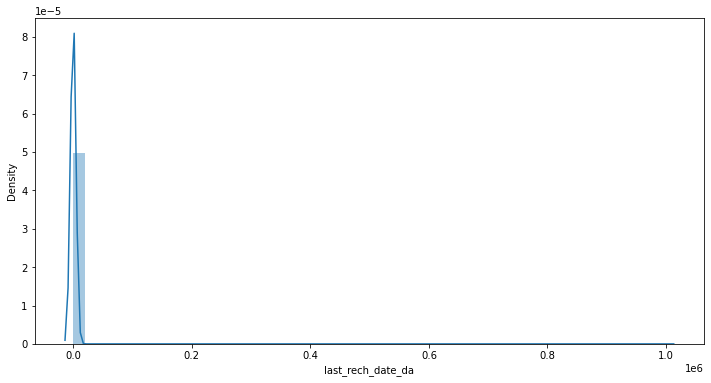

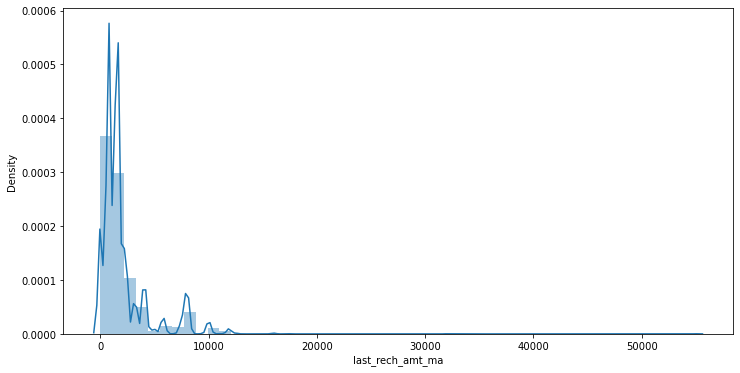

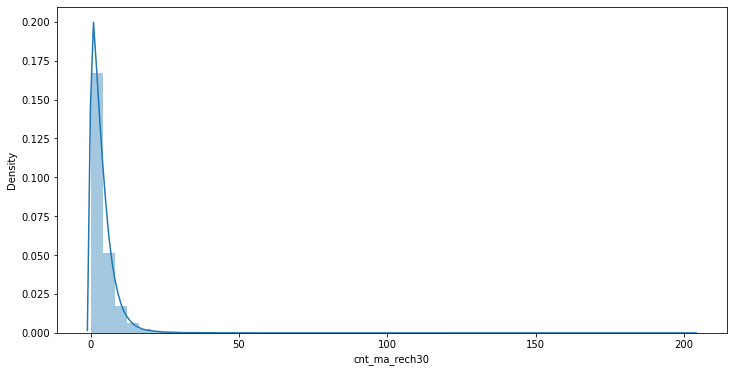

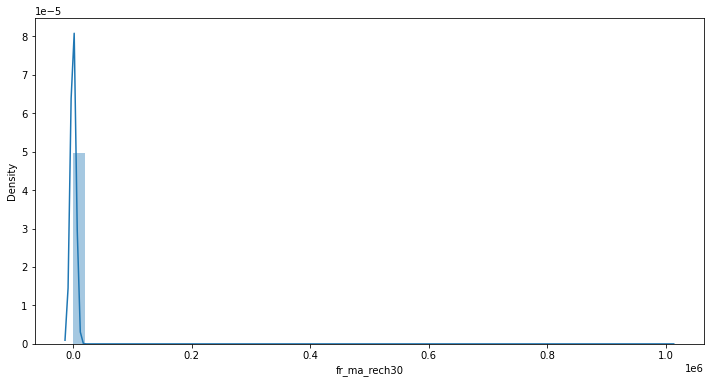

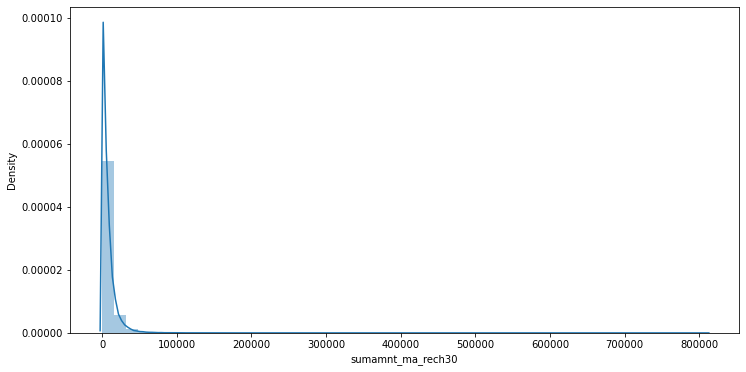

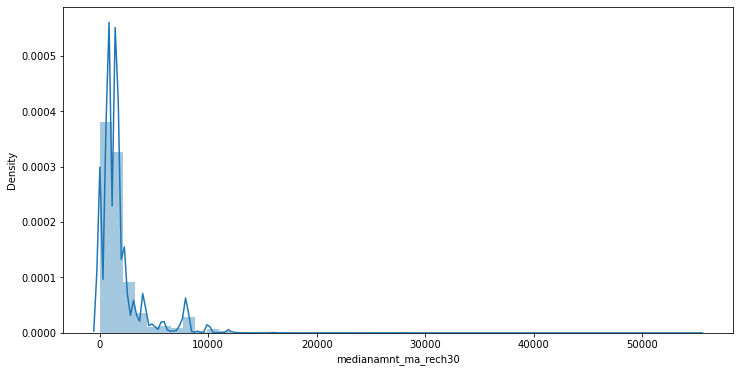

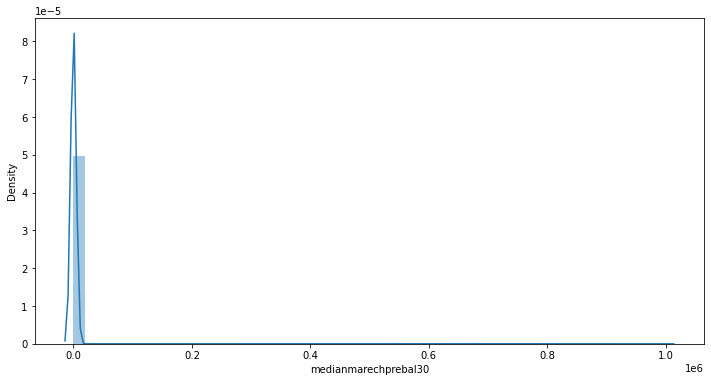

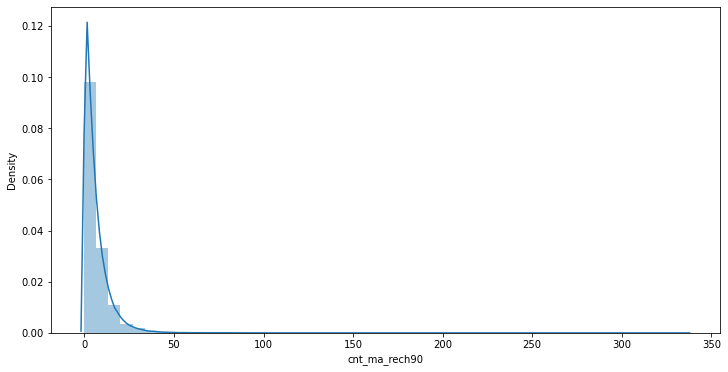

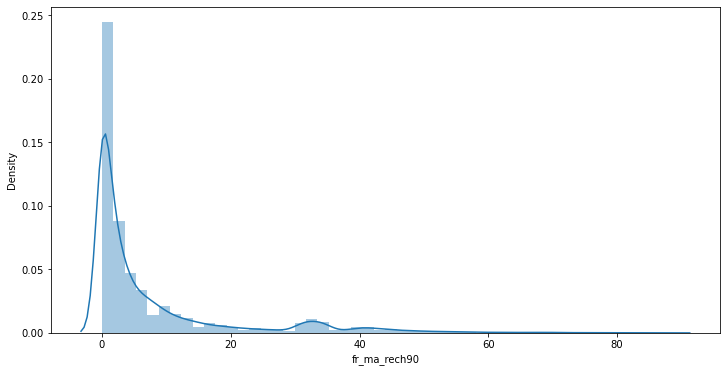

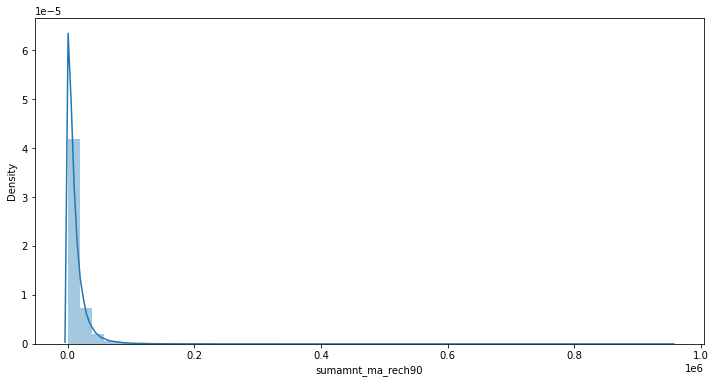

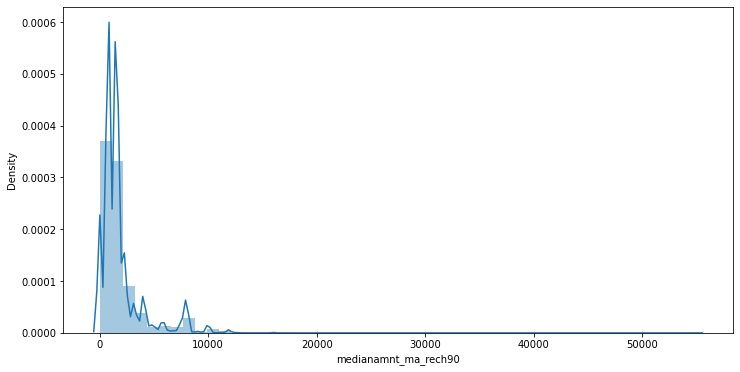

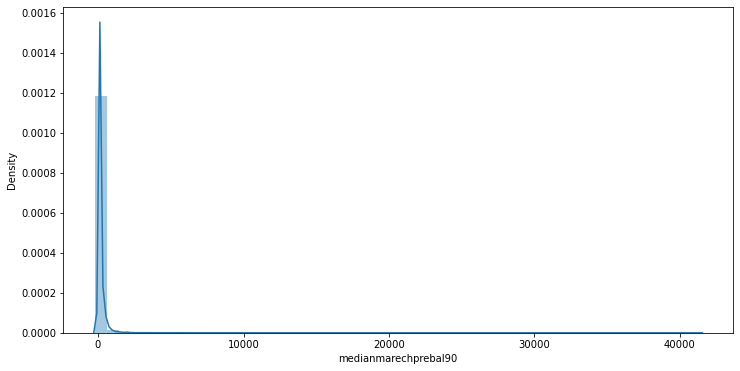

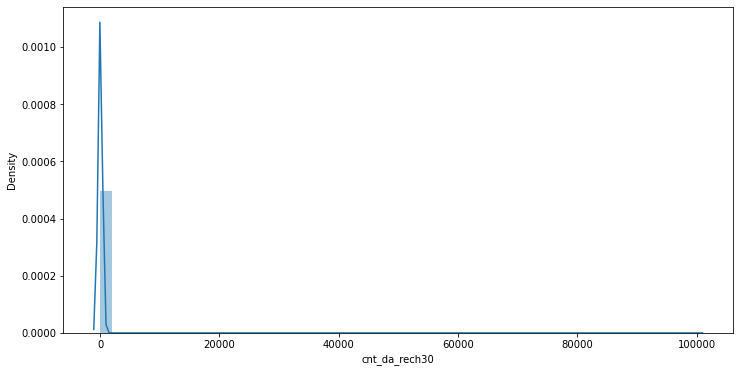

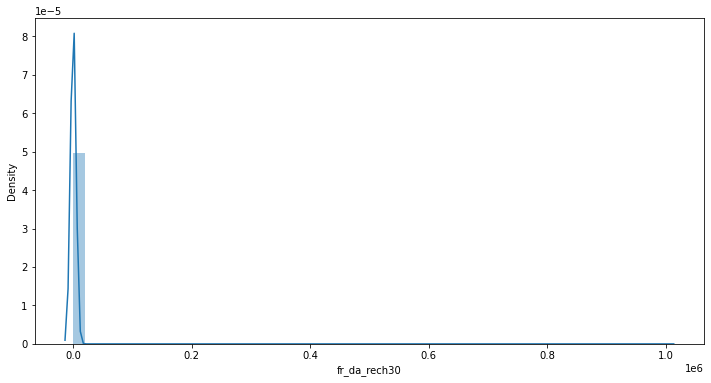

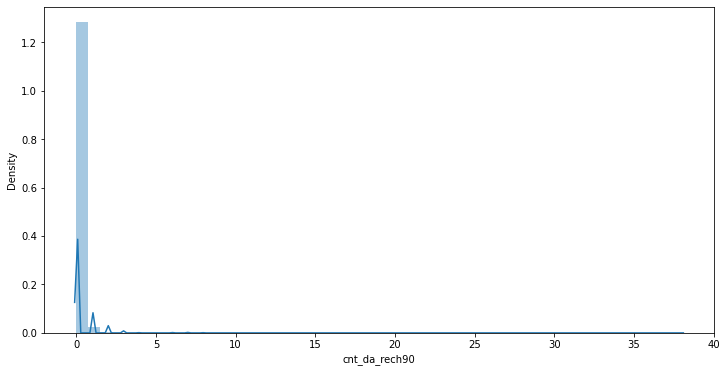

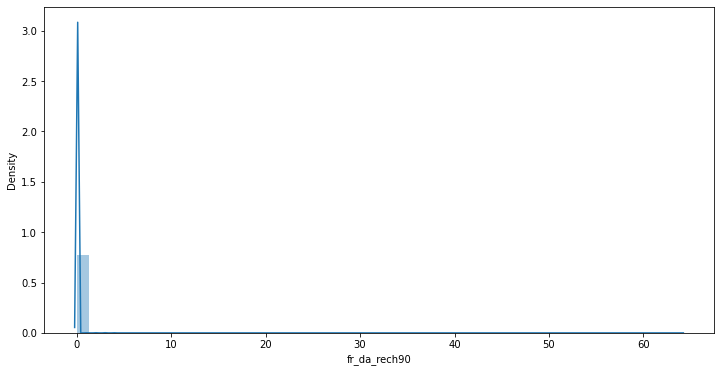

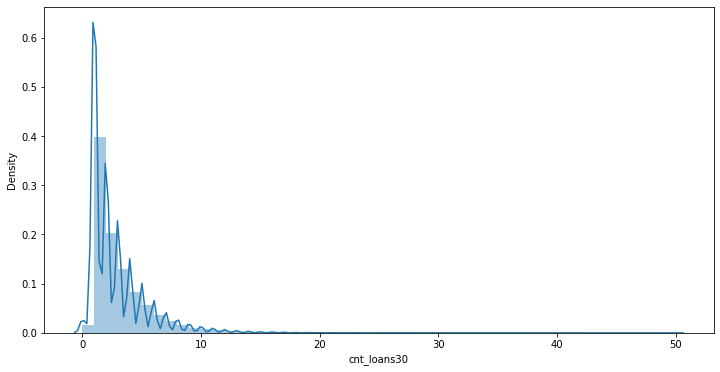

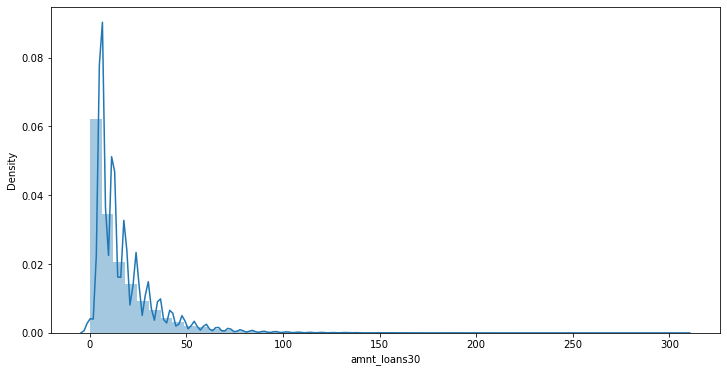

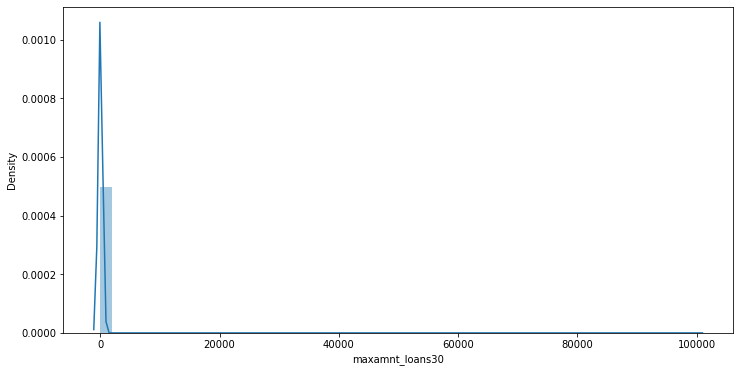

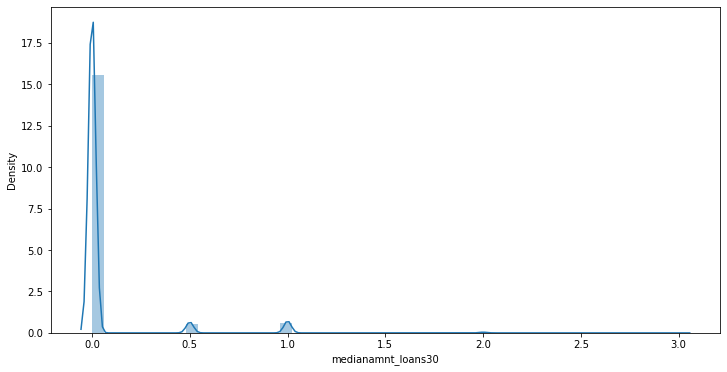

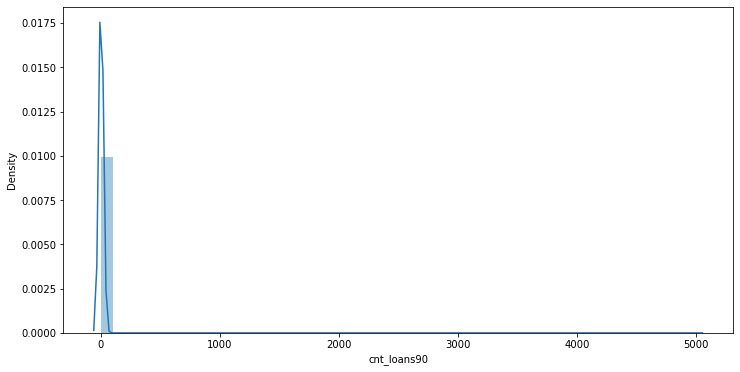

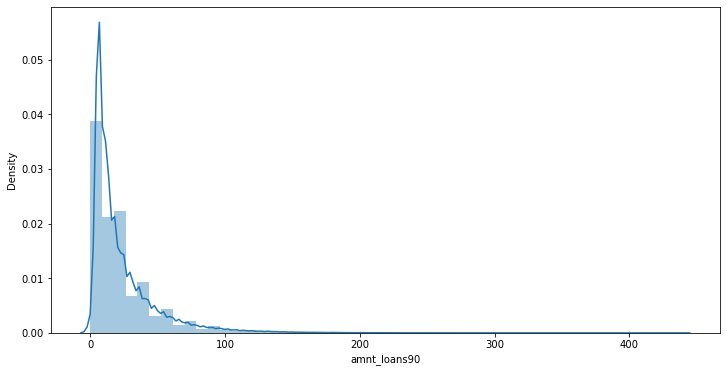

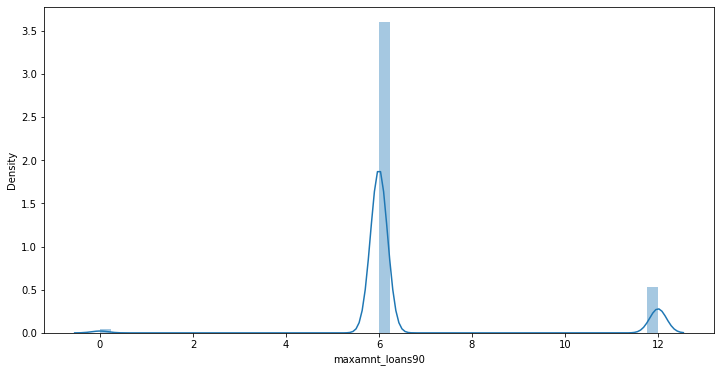

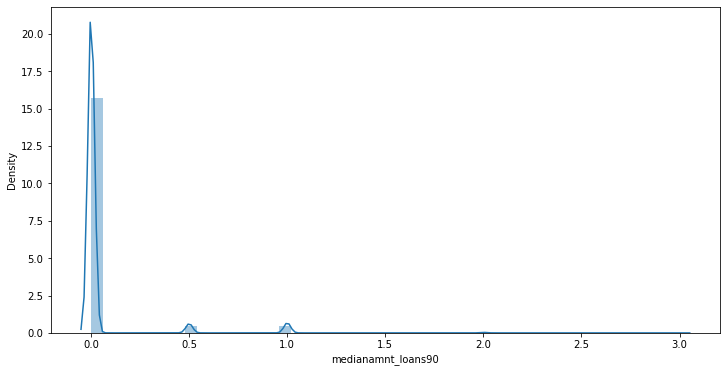

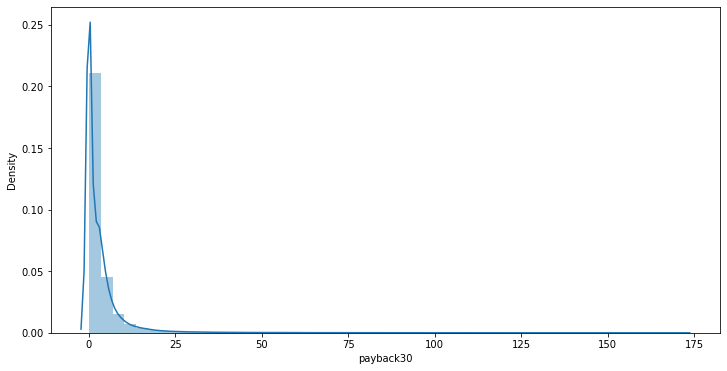

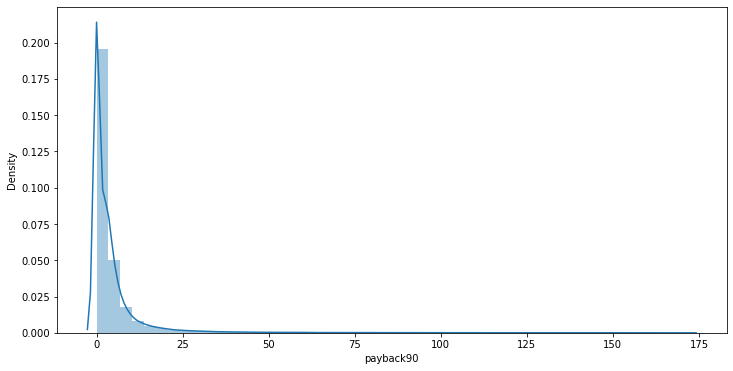

In [36]:
for i in ds.columns:
    plt.figure(figsize=(12,6))
    sns.distplot(ds[i])

from above we can see that most of the data is right skewed so lets us perform IQR and replace the outlier by the upperlimit

In [37]:
def Inter(col):
    IQR = ds[col].quantile(0.75) - ds[col].quantile(0.25)
    lower = ds[col].quantile(0.25)  - (IQR*3)
    upper = ds[col].quantile(0.75) + (IQR*3)
    return (lower, upper)

we will not perform outlier removal for our Target variable

In [38]:
for i in ds.columns.drop('label', 1):
    lower, upper = Inter(i)
    if upper > 0:
        ds.loc[ds[i] >= upper, i] = upper

lets remove the outliers from above columns we will neglect the column with upper as 0

In [39]:
for i in ds.columns.drop('label', 1):
    if ds[i].skew() > 0.5:
        ds[i] = np.cbrt(ds[i])
    elif ds[i].skew() > -0.5:
        ds[i] = np.cbrt(ds[i])

In [40]:
ds.skew()

label                   -2.270254
aon                     -0.383531
daily_decr30             0.395383
daily_decr90             0.429955
rental30                -0.150156
rental90                -0.095519
last_rech_date_ma       -0.897839
last_rech_date_da       14.001042
last_rech_amt_ma        -0.710114
cnt_ma_rech30           -0.671301
fr_ma_rech30             0.103506
sumamnt_ma_rech30       -0.402545
medianamnt_ma_rech30    -0.949223
medianmarechprebal30    -0.498591
cnt_ma_rech90           -0.497626
fr_ma_rech90             0.213983
sumamnt_ma_rech90       -0.237163
medianamnt_ma_rech90    -1.009635
medianmarechprebal90    -0.757990
cnt_da_rech30           14.792314
fr_da_rech30            14.127590
cnt_da_rech90            6.670255
fr_da_rech90            17.539627
cnt_loans30              0.154382
amnt_loans30             0.164927
maxamnt_loans30         -7.850225
medianamnt_loans30       3.558178
cnt_loans90              0.564323
amnt_loans90             0.519701
maxamnt_loans9

lets now see the density plot and see the skewness

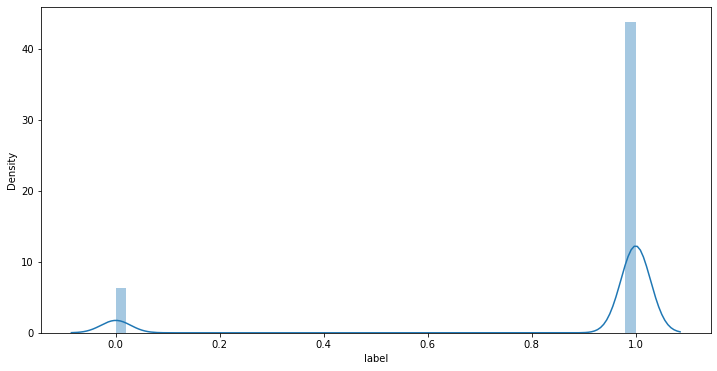

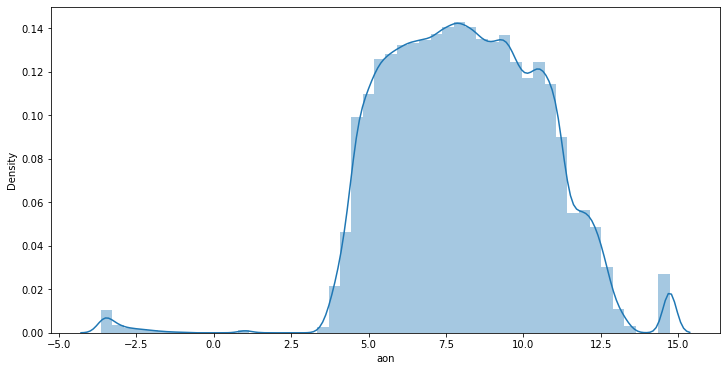

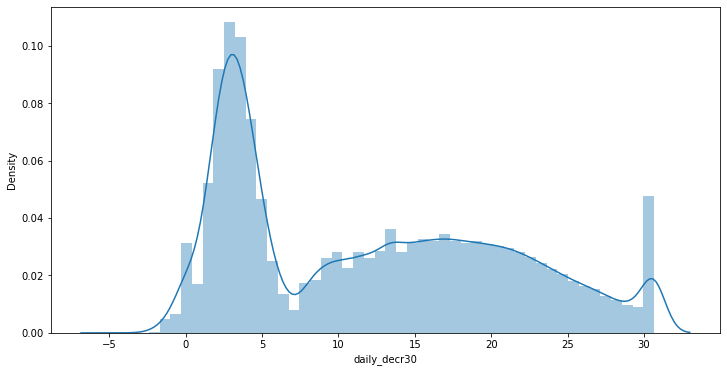

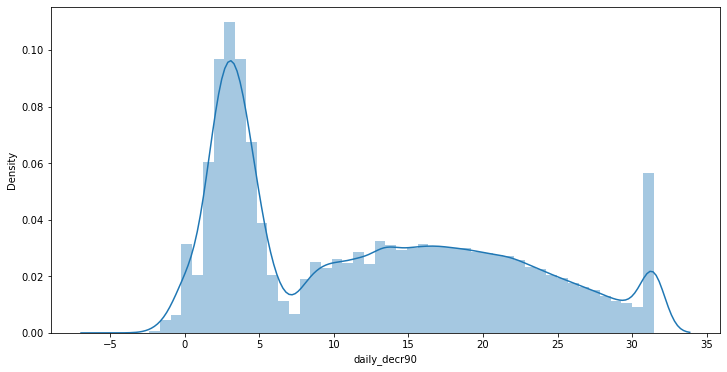

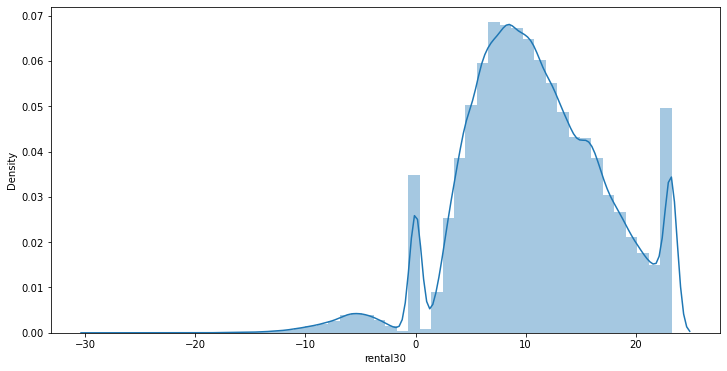

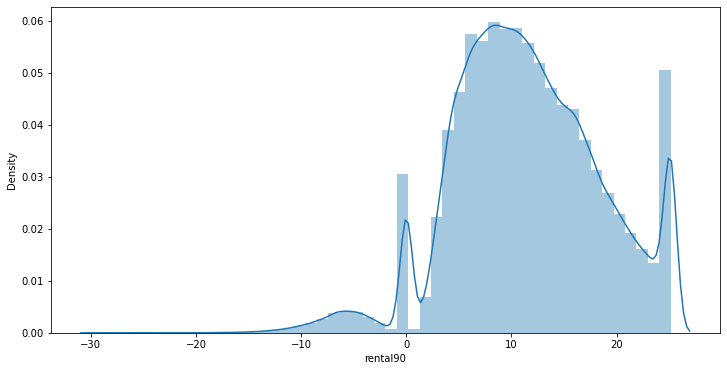

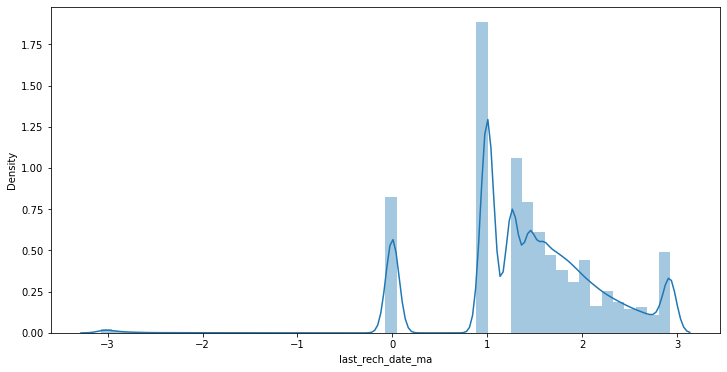

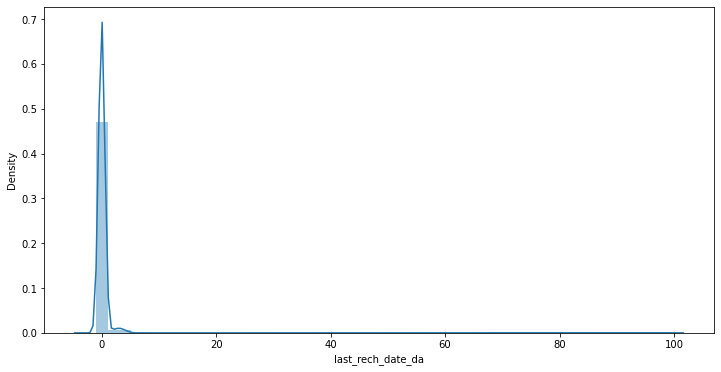

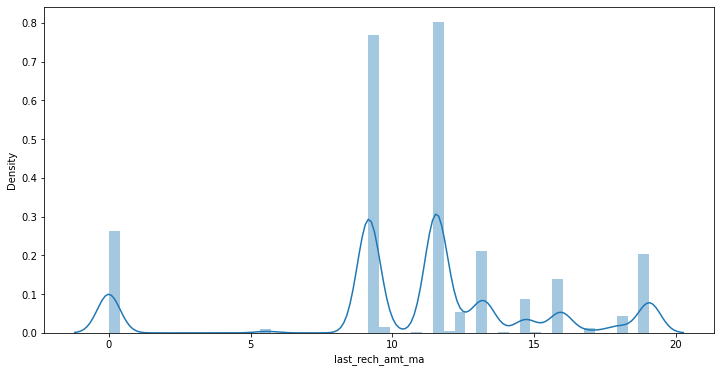

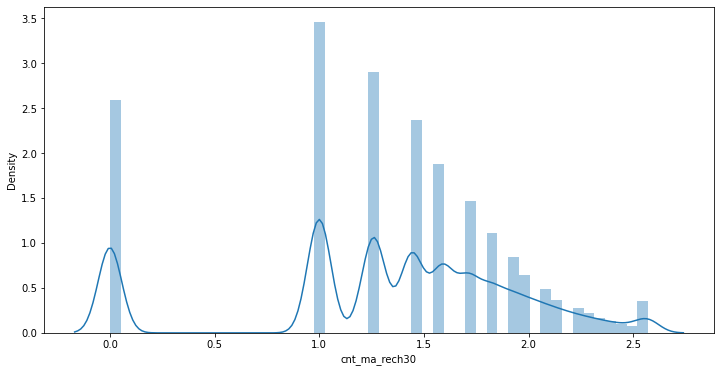

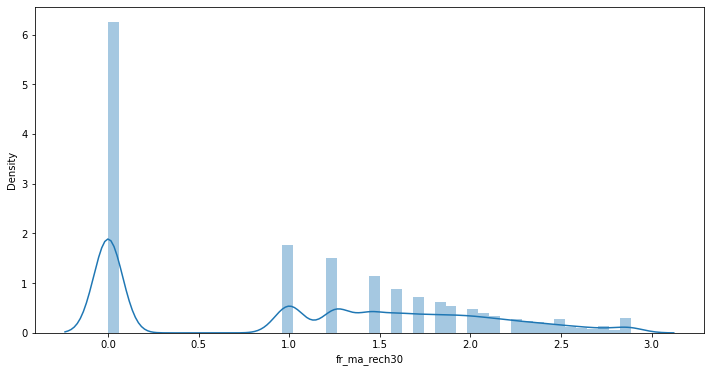

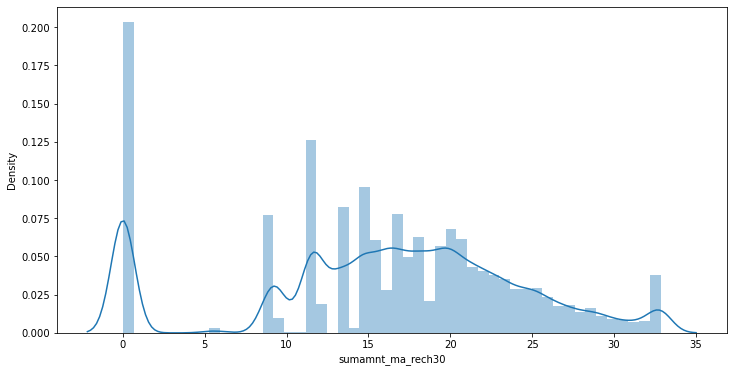

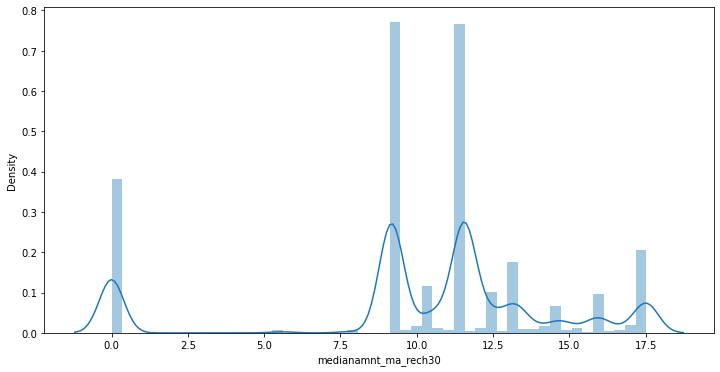

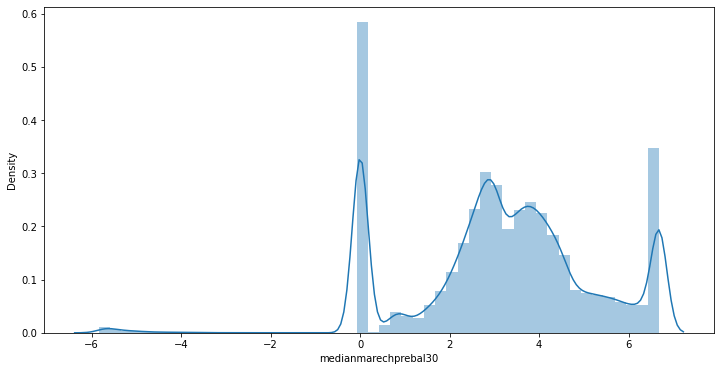

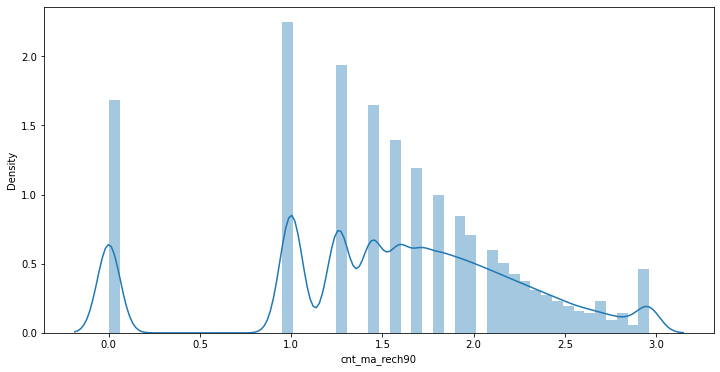

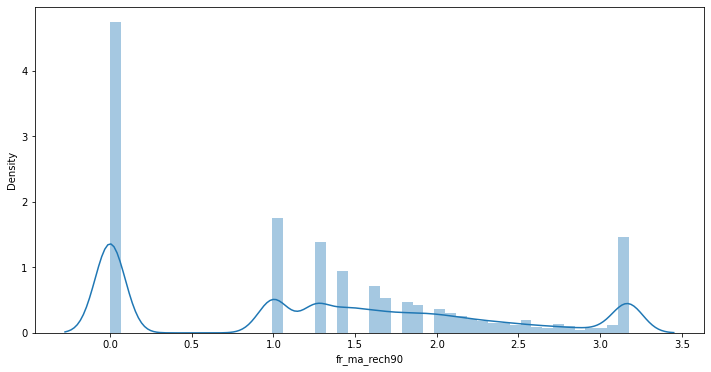

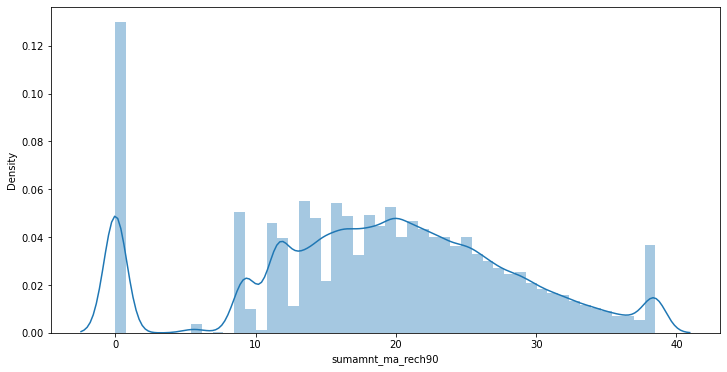

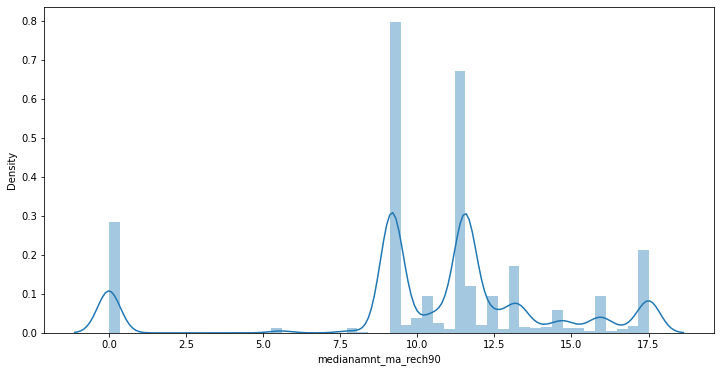

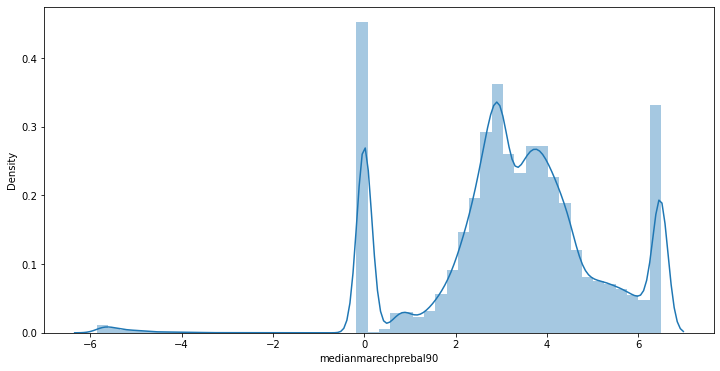

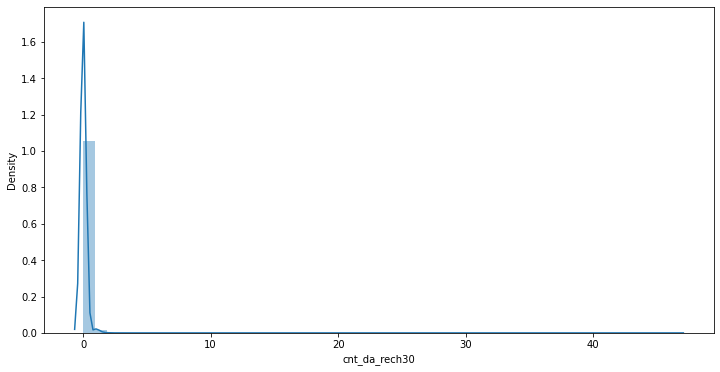

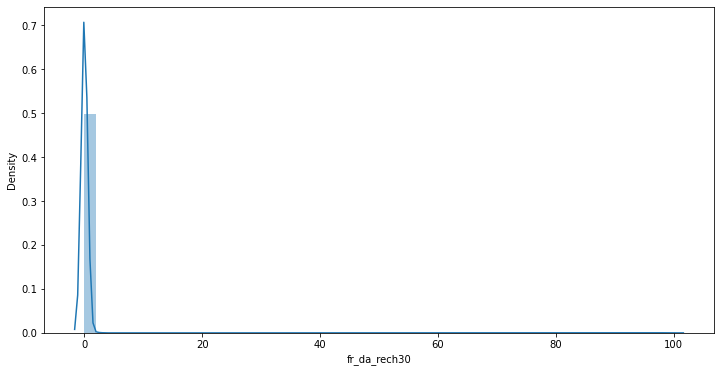

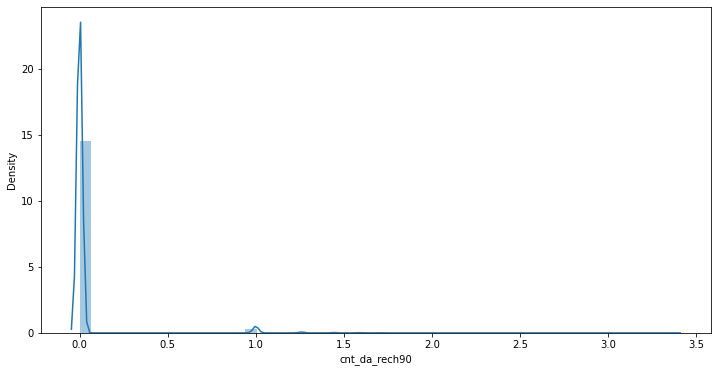

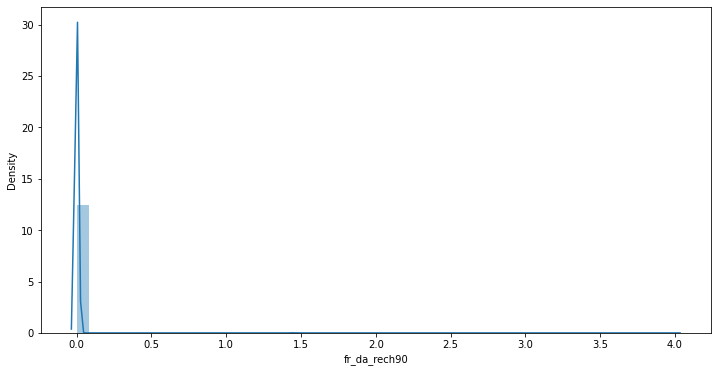

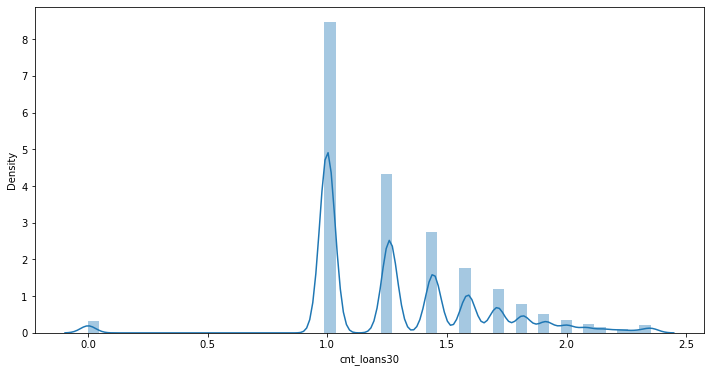

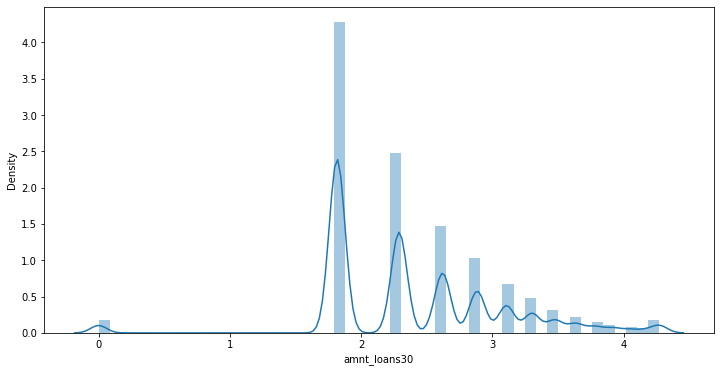

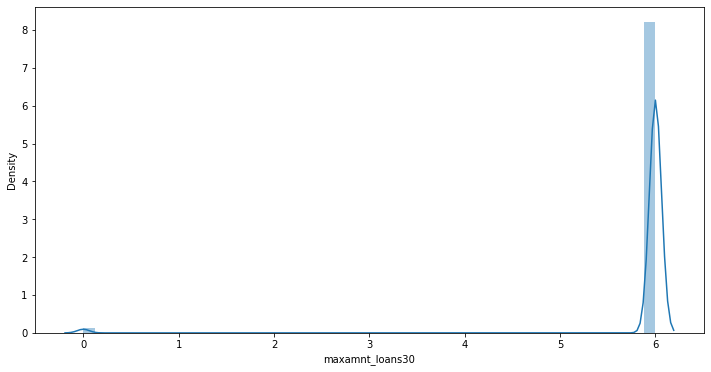

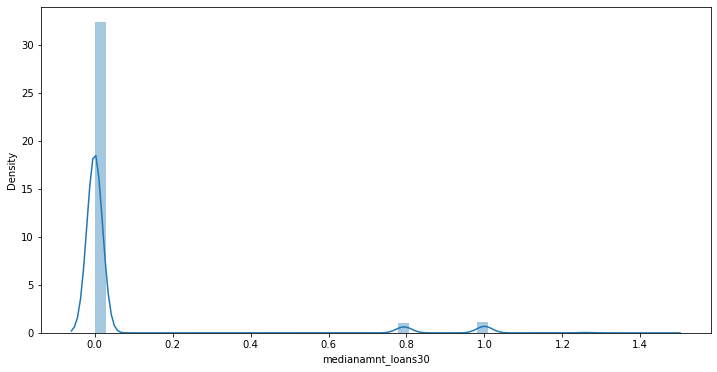

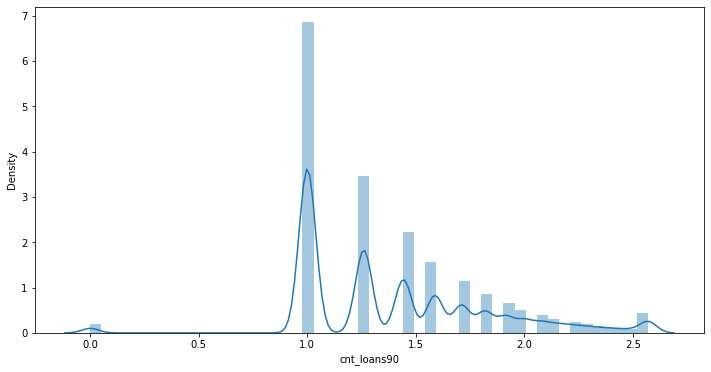

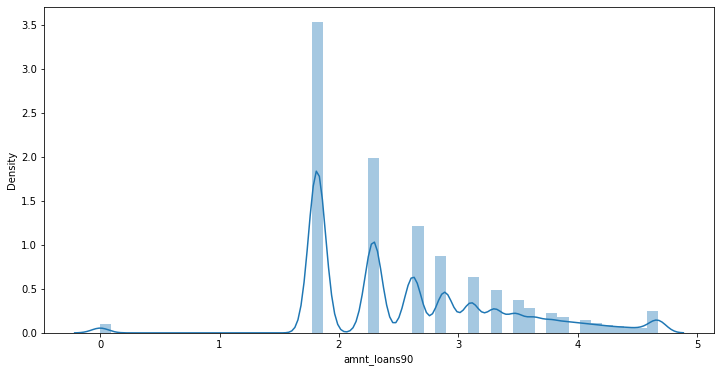

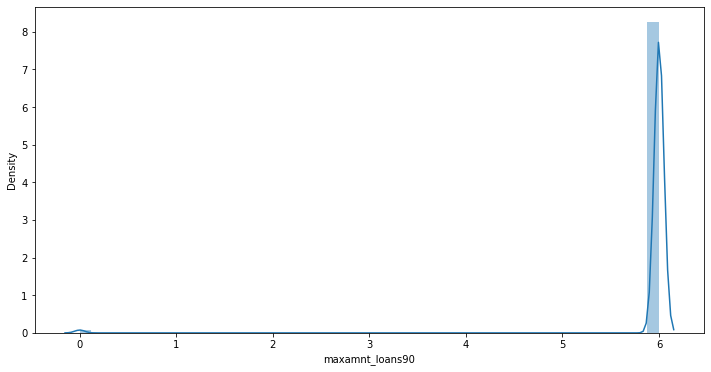

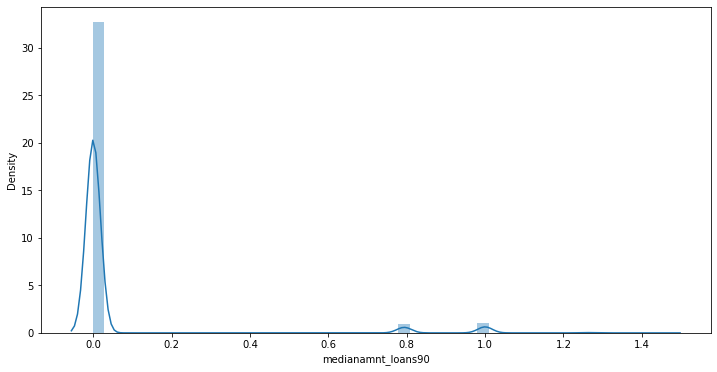

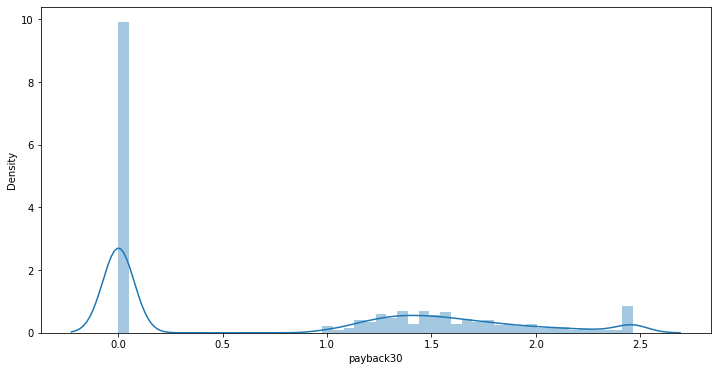

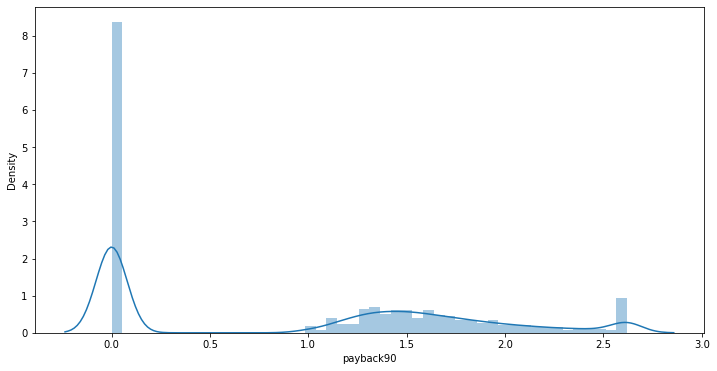

In [41]:
for i in ds.columns:
    plt.figure(figsize=(12,6))
    sns.distplot(ds[i])

from above we can see that we have almost fix all the columns skewness

lets split the data into independent and dependent variable 

In [42]:
X = ds.drop('label', 1)
Y = ds['label']

In [43]:
sc = StandardScaler()
X_new = sc.fit_transform(X)
X_new = pd.DataFrame(X_new, columns = X.columns)

In [44]:
X_new

aon  daily_decr30  daily_decr90  rental30  rental90  \
0      -0.650542      0.268682      0.228019 -0.721046 -0.722130   
1       0.326789      1.209757      1.130972  0.751742  0.574273   
2       0.003129     -0.101526     -0.129498 -0.155280 -0.254537   
3      -0.752707     -1.037180     -1.028762 -0.817349 -0.859516   
4       0.682030     -0.753379     -0.755999 -0.051428 -0.159640   
...          ...           ...           ...       ...       ...   
209588 -0.286249     -0.751742     -0.754426 -0.056196 -0.163997   
209589  0.851102     -0.974738     -0.968749  0.211560  0.080670   
209590  0.770989      1.190012      1.116001  1.154640  1.326531   
209591  1.555204      1.235232      1.160959 -0.501770 -0.212666   
209592  1.411746      0.489612      0.444581 -0.437488 -0.408501   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0               -0.230301          -0.083373          0.143725      -0.112583   
1                1.574906          -0.083373          1.523388      -0.511677   
2               -0.004010          -0.083373          0.143725      -0.511677   
3                1.835046          -0.083373         -0.227752      -2.047118   
4                0.176141          -0.083373          0.503654       0.890076   
...                   ...                ...               ...            ...   
209588          -0.552895          -0.083373          1.089271       0.167372   
209589           0.176141          -0.083373         -0.366098       0.390244   
209590          -0.004010          -0.083373          0.143725       0.578450   
209591          -0.230301           0.443055         -0.366098       0.578450   
209592           1.124276          -0.083373          1.761958      -0.112583   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0           1.847955          -0.185008              0.291860   
1          -1.151998           0.221049              1.572955   
2          -1.151998          -0.542650              0.291860   
3          -1.151998          -1.918613             -2.180114   
4           0.217994           1.317922              0.649794   
...              ...                ...                   ...   
209588      0.217994           0.683108              0.967748   
209589     -0.064635          -0.182384             -0.215137   
209590      1.022728           0.590671              0.291860   
209591      0.574084           0.821491             -0.215137   
209592     -0.064635           0.566331              1.363206   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  -0.591633      -0.420013      1.370287          -0.466854   
1                   0.368064      -0.779353     -1.216004          -0.106935   
2                   0.421578      -0.779353     -1.216004          -0.783859   
3                  -1.540429      -0.779353     -1.216004          -0.966122   
4                  -0.051233       0.603144     -0.034919           1.022110   
...                      ...            ...           ...                ...   
209588              0.646237      -0.167944     -0.034919           0.302624   
209589              1.098112       0.350314     -0.034919          -0.321319   
209590              0.258626       0.912796      0.386975           0.794991   
209591              1.112753       0.350314      0.272069           0.761939   
209592              1.700798      -0.167944      1.285429           0.690760   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                   0.236303             -0.673926      -0.075501   
1                   1.627658              0.364372      -0.075501   
2                   0.236303              0.422269      -0.075501   
3                  -0.165566             -0.988692      -0.075501   
4                   0.864063              0.014960      -0.075501   
...                      ...                   ...            ...  

from above we can see that we have successfully scaled all our values in same scale so now lets now see how the model performs with imbalanced dataset

In [45]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   aon                   209593 non-null  float64
 1   daily_decr30          209593 non-null  float64
 2   daily_decr90          209593 non-null  float64
 3   rental30              209593 non-null  float64
 4   rental90              209593 non-null  float64
 5   last_rech_date_ma     209593 non-null  float64
 6   last_rech_date_da     209593 non-null  float64
 7   last_rech_amt_ma      209593 non-null  float64
 8   cnt_ma_rech30         209593 non-null  float64
 9   fr_ma_rech30          209593 non-null  float64
 10  sumamnt_ma_rech30     209593 non-null  float64
 11  medianamnt_ma_rech30  209593 non-null  float64
 12  medianmarechprebal30  209593 non-null  float64
 13  cnt_ma_rech90         209593 non-null  float64
 14  fr_ma_rech90          209593 non-null  float64
 15  

In [46]:
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.22, random_state = 42)

we know that ensemble techniques handels the imbalanced. dataset well so lets look at RandomForest at random_state = 42 later we will find the best random state and fit all our models

In [48]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
pred = rfc.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, pred))
print("Classification report:", classification_report(Y_test, pred))
print("Confusion Matrix:", confusion_matrix(Y_test, pred))

Accuracy Score: 0.9116046062761597
Classification report:               precision    recall  f1-score   support

           0       0.76      0.44      0.56      5825
           1       0.92      0.98      0.95     40286

    accuracy                           0.91     46111
   macro avg       0.84      0.71      0.75     46111
weighted avg       0.90      0.91      0.90     46111

Confusion Matrix: [[ 2551  3274]
 [  802 39484]]


from above we can see accuracy score of 91.17% at random state 42 lets now find the best random state and then we will try to fix the imbalanced dataset

In [49]:
maxacc = 0
maxrs = 0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.22, random_state = i)
    log = LogisticRegression()
    log.fit(X_train, Y_train)
    pred = log.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
        
print("Maximum Accuracy is {} at Random State {}".format(maxacc, maxrs))

Maximum Accuracy is 0.886057556765197 at Random State 806


from above we can see that we are getting 89% at random state 806 lets now fit all our model at random state 170 and see there accurscy and other metrics 

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.22, random_state = 806)

In [51]:
log = LogisticRegression()
log.fit(X_train, Y_train)
predlr = log.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, predlr))
print("Classification Score:", classification_report(Y_test, predlr))
print("Confusion Matrix:", confusion_matrix(Y_test, predlr))

Accuracy Score: 0.886057556765197
Classification Score:               precision    recall  f1-score   support

           0       0.58      0.19      0.29      5550
           1       0.90      0.98      0.94     40561

    accuracy                           0.89     46111
   macro avg       0.74      0.59      0.61     46111
weighted avg       0.86      0.89      0.86     46111

Confusion Matrix: [[ 1061  4489]
 [  765 39796]]


from above we can see that the accuracy is very good but as it is a Classification problem we have to look at other meterics too as the dataset is Imbalanced we are getting very low score for 0 and if we use this model it will give is wrong result for imbalanced dataset ensemble and XGBoost works well so lets see if there is difference between them or not

In [52]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
predrfc = rfc.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, predrfc))
print("Classification Score:", classification_report(Y_test, predrfc))
print("Confusion Matrix:", confusion_matrix(Y_test, predrfc))

Accuracy Score: 0.9162455813146537
Classification Score:               precision    recall  f1-score   support

           0       0.76      0.45      0.56      5550
           1       0.93      0.98      0.95     40561

    accuracy                           0.92     46111
   macro avg       0.84      0.71      0.76     46111
weighted avg       0.91      0.92      0.91     46111

Confusion Matrix: [[ 2491  3059]
 [  803 39758]]


from above we can see that random forest has performed better than Logistic Regression lets now look for XGBoost

In [53]:
xgb = XGBClassifier(verbosity = 0)
xgb.fit(X_train, Y_train)
predxgb = xgb.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, predxgb))
print("Classification Score:", classification_report(Y_test, predxgb))
print("Confusion Matrix:", confusion_matrix(Y_test, predxgb))

Accuracy Score: 0.9172431740799375
Classification Score:               precision    recall  f1-score   support

           0       0.76      0.45      0.57      5550
           1       0.93      0.98      0.95     40561

    accuracy                           0.92     46111
   macro avg       0.85      0.72      0.76     46111
weighted avg       0.91      0.92      0.91     46111

Confusion Matrix: [[ 2520  3030]
 [  786 39775]]


XGBoostClassifier has performed marginally well than Random Forest

In [54]:
xgbrfc = XGBRFClassifier(verbosity = 0)
xgbrfc.fit(X_train, Y_train)
predxgbrfc = xgbrfc.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, predxgbrfc))
print("Classification Score:", classification_report(Y_test, predxgbrfc))
print("Confusion Matrix:", confusion_matrix(Y_test, predxgbrfc))

Accuracy Score: 0.9078744768059682
Classification Score:               precision    recall  f1-score   support

           0       0.84      0.29      0.43      5550
           1       0.91      0.99      0.95     40561

    accuracy                           0.91     46111
   macro avg       0.87      0.64      0.69     46111
weighted avg       0.90      0.91      0.89     46111

Confusion Matrix: [[ 1616  3934]
 [  314 40247]]


So from the above model we can say that XGBoostClassifier is the best model before fixing the imbalanced data lets now fix it using over sampler if it doesn't work we will use SMOTETomek

In [55]:
os = RandomOverSampler(0.75, random_state = 170)

so here we will increase our 0 column in the ratio 75% of 1 with the best random state that we have got

In [56]:
x_train, y_train = os.fit_resample(X_new ,Y)

lets see the shape of the data after fixing the imbalancing

In [57]:
x_train.shape, y_train.shape

((321004, 32), (321004,))

In [58]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train)))

Original dataset shape Counter({1: 183431, 0: 26162})
Resampled dataset shape Counter({1: 183431, 0: 137573})


from above we can see that we have increased the number of 0

lets train our model on this training set and lets see the accuracy

In [59]:
log = LogisticRegression()
log.fit(x_train, y_train)
predolr = log.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, predolr))
print("Classification Score:", classification_report(Y_test, predolr))
print("Confusion Matrix:", confusion_matrix(Y_test, predolr))

Accuracy Score: 0.7977489102383379
Classification Score:               precision    recall  f1-score   support

           0       0.34      0.73      0.47      5550
           1       0.96      0.81      0.88     40561

    accuracy                           0.80     46111
   macro avg       0.65      0.77      0.67     46111
weighted avg       0.88      0.80      0.83     46111

Confusion Matrix: [[ 4059  1491]
 [ 7835 32726]]


from above we can see that we have increased some of the metric but the accuracy score has decreased lets see for ensemble techniques

In [60]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predorfc = rfc.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, predorfc))
print("Classification Score:", classification_report(Y_test, predorfc))
print("Confusion Matrix:", confusion_matrix(Y_test, predorfc))

Accuracy Score: 0.9996313244128299
Classification Score:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5550
           1       1.00      1.00      1.00     40561

    accuracy                           1.00     46111
   macro avg       1.00      1.00      1.00     46111
weighted avg       1.00      1.00      1.00     46111

Confusion Matrix: [[ 5550     0]
 [   17 40544]]


from above we can see that random forest if predicting the test data very well and has 100% accuracy. we will see if the model is overfitted or not using Cross Validation Score

In [61]:
xgb = XGBClassifier(verbosity = 0)
xgb.fit(x_train, y_train)
predoxgb = xgb.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, predoxgb))
print("Classification Score:", classification_report(Y_test, predoxgb))
print("Confusion Matrix:", confusion_matrix(Y_test, predoxgb))

Accuracy Score: 0.8803539285636833
Classification Score:               precision    recall  f1-score   support

           0       0.50      0.82      0.62      5550
           1       0.97      0.89      0.93     40561

    accuracy                           0.88     46111
   macro avg       0.74      0.86      0.78     46111
weighted avg       0.92      0.88      0.89     46111

Confusion Matrix: [[ 4560   990]
 [ 4527 36034]]


In [62]:
xgbrfc = XGBRFClassifier(verbosity = 0)
xgbrfc.fit(x_train, y_train)
predoxgbrfc = xgbrfc.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, predoxgbrfc))
print("Classification Score:", classification_report(Y_test, predoxgbrfc))
print("Confusion Matrix:", confusion_matrix(Y_test, predoxgbrfc))

Accuracy Score: 0.7993971069809807
Classification Score:               precision    recall  f1-score   support

           0       0.35      0.75      0.47      5550
           1       0.96      0.81      0.88     40561

    accuracy                           0.80     46111
   macro avg       0.65      0.78      0.67     46111
weighted avg       0.89      0.80      0.83     46111

Confusion Matrix: [[ 4153  1397]
 [ 7853 32708]]


from above we can see that the best model before cross validation is RandomForest lets now do SMOTETomek so that we can see if it increases the accuracy for other algorithms or not

In [63]:
smk = SMOTETomek(random_state = 170)

In [64]:
X_Train, Y_Train = smk.fit_resample(X_new, Y)

In [65]:
print(X_Train.shape, Y_Train.shape)

(364362, 32) (364362,)


In [66]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_Train)))

Original dataset shape Counter({1: 183431, 0: 26162})
Resampled dataset shape Counter({0: 182181, 1: 182181})


from above we can see that both 0 and 1 has the same amount of records lets us now fit some models and see the performance

In [67]:
log = LogisticRegression()
log.fit(X_Train, Y_Train)
predsmlog = log.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, predsmlog))
print("Classification Score:", classification_report(Y_test, predsmlog))
print("Confusion Matrix:", confusion_matrix(Y_test, predsmlog))

Accuracy Score: 0.7613584611047256
Classification Score:               precision    recall  f1-score   support

           0       0.31      0.79      0.44      5550
           1       0.96      0.76      0.85     40561

    accuracy                           0.76     46111
   macro avg       0.64      0.77      0.65     46111
weighted avg       0.88      0.76      0.80     46111

Confusion Matrix: [[ 4373  1177]
 [ 9827 30734]]


In [68]:
rfc = RandomForestClassifier()
rfc.fit(X_Train, Y_Train)
predsmrfc = rfc.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, predsmrfc))
print("Classification Score:", classification_report(Y_test, predsmrfc))
print("Confusion Matrix:", confusion_matrix(Y_test, predsmrfc))

Accuracy Score: 0.9964650517230162
Classification Score:               precision    recall  f1-score   support

           0       0.97      1.00      0.99      5550
           1       1.00      1.00      1.00     40561

    accuracy                           1.00     46111
   macro avg       0.99      1.00      0.99     46111
weighted avg       1.00      1.00      1.00     46111

Confusion Matrix: [[ 5535    15]
 [  148 40413]]


By fitting above two algorithm we can see that Smotetomek has done good work but over sampling is better lets now fit all our models using oversampling technique

In [69]:
rfc.feature_importances_

array([0.04722657, 0.06940515, 0.07293589, 0.04178246, 0.04105789,
       0.04935418, 0.00199321, 0.03707234, 0.06742836, 0.01829961,
       0.05633868, 0.02672012, 0.02704158, 0.10644371, 0.02753429,
       0.07658809, 0.02804652, 0.03046445, 0.00127098, 0.00074464,
       0.00127968, 0.00028692, 0.0218251 , 0.02952837, 0.00177274,
       0.00301919, 0.03016422, 0.03326429, 0.00080751, 0.00316524,
       0.01189619, 0.03524184])

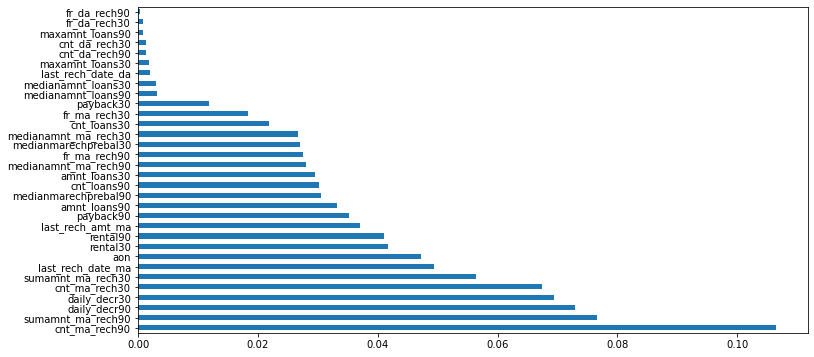

In [70]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(33).plot(kind='barh')
plt.show()

from above we can see the important features 

from above we can see that all the features has some relation with our target variable so we will use all the columns

lets now fit out models using Hyperparameter Tuning and Cross validation and see the accuracy of each model and then we will select our best model

In [71]:
parameterlr = {
    'penalty':['l1','l2','none'],
    'C':[1,2,3]
}

In [72]:
gscvlr = GridSearchCV(log, parameterlr, cv = 5)
gscvlr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3], 'penalty': ['l1', 'l2', 'none']})

In [73]:
print("Logistic Regression")
predlr = gscvlr.best_estimator_.predict(X_test)
acclr = accuracy_score(Y_test, predlr)*100
print("Accuracy Score:", acclr)
print("Classification Score", classification_report(Y_test, predlr))
print("Confusion Matrix:", confusion_matrix(Y_test, predlr))
f1lr = f1_score(Y_test, predlr)*100
precisionlr = precision_score(Y_test, predlr, pos_label=0)*100
recalllr = recall_score(Y_test, predlr, pos_label=0)*100
print("F1 Score:", f1lr)
print("Precision Score:", precisionlr)
print("Recall Score:", recalllr)

Logistic Regression
Accuracy Score: 79.72718006549412
Classification Score               precision    recall  f1-score   support

           0       0.34      0.73      0.47      5550
           1       0.96      0.81      0.87     40561

    accuracy                           0.80     46111
   macro avg       0.65      0.77      0.67     46111
weighted avg       0.88      0.80      0.83     46111

Confusion Matrix: [[ 4064  1486]
 [ 7862 32699]]
F1 Score: 87.49364514489069
Precision Score: 34.076806976354185
Recall Score: 73.22522522522522


In [74]:
parameterdtc = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[1,2,3],
    'max_features':['auto','sqrt','log2'],
    'ccp_alpha':[0.000001,0.00001,0.0001]
}

In [75]:
dtc = DecisionTreeClassifier()
gscvdtc = GridSearchCV(dtc, parameterdtc, cv = 5)
gscvdtc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [1e-06, 1e-05, 0.0001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [76]:
print("Decision Tree")
predtc = gscvdtc.best_estimator_.predict(X_test)
accdtc = accuracy_score(Y_test, predtc)*100
print("Accuracy Score:", accdtc)
print("Classification Report:", classification_report(Y_test, predtc))
print("Confusion Matrix:", confusion_matrix(Y_test, predtc))
f1dtc = f1_score(Y_test, predtc, pos_label = 0)*100
precisiondtc = precision_score(Y_test, predtc, pos_label = 0)*100
recalldtc = recall_score(Y_test, predtc, pos_label = 0)*100
print("F1 Score:", f1dtc)
print("Precision Score", precisiondtc)
print("Recall Score:", recalldtc)

Decision Tree
Accuracy Score: 79.36501051809763
Classification Report:               precision    recall  f1-score   support

           0       0.32      0.65      0.43      5550
           1       0.94      0.81      0.87     40561

    accuracy                           0.79     46111
   macro avg       0.63      0.73      0.65     46111
weighted avg       0.87      0.79      0.82     46111

Confusion Matrix: [[ 3609  1941]
 [ 7574 32987]]
F1 Score: 43.13631745652304
Precision Score 32.27219887328982
Recall Score: 65.02702702702703


In [77]:
parameterrfc = {
    'n_estimators':[100,200,300],
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3]
}

In [78]:
gscvrfc = GridSearchCV(rfc, parameterrfc, cv = 5)
gscvrfc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [100, 200, 300]})

In [79]:
print("Random Forest")
predrfc = gscvrfc.best_estimator_.predict(X_test)
accrfc = accuracy_score(Y_test, predrfc)*100
print("Accuracy Score:",accrfc)
print("Classification Report:", classification_report(Y_test, predrfc))
print("Confusion Matrix:", confusion_matrix(Y_test, predrfc))
f1rfc = f1_score(Y_test, predrfc, pos_label = 0)*100
precisionrfc = precision_score(Y_test, predrfc, pos_label = 0)*100
recallrfc = recall_score(Y_test, predrfc, pos_label = 0)*100
print("F1 Score:",f1rfc)
print("Precision Score:", precisionrfc)
print("Recall Score:", recallrfc)

Random Forest
Accuracy Score: 80.32790440458892
Classification Report:               precision    recall  f1-score   support

           0       0.34      0.69      0.46      5550
           1       0.95      0.82      0.88     40561

    accuracy                           0.80     46111
   macro avg       0.65      0.75      0.67     46111
weighted avg       0.88      0.80      0.83     46111

Confusion Matrix: [[ 3810  1740]
 [ 7331 33230]]
F1 Score: 45.65334611467258
Precision Score: 34.19800736020106
Recall Score: 68.64864864864865


In [80]:
parametergnb = {
    'priors': [None],
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001]
}

In [81]:
gnb = GaussianNB()
gscvgnb = GridSearchCV(gnb, parametergnb, cv = 5)
gscvgnb.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None],
                         'var_smoothing': [1e-08, 1e-09, 1e-08]})

In [82]:
print("Gaussian NB")
predgnb = gscvgnb.predict(X_test)
accgnb = accuracy_score(Y_test, predgnb)*100
print("Accuracy Score:", accgnb)
print("Classification Report:", classification_report(Y_test, predgnb))
print("Confusion Matrix:", confusion_matrix(Y_test, predgnb))
f1gnb = f1_score(Y_test, predgnb, pos_label=0)*100
precisiongnb = precision_score(Y_test, predgnb, pos_label=0)*100
recallgnb = recall_score(Y_test, predgnb)*100
print("F1 Score:", f1gnb)
print("Precision Score:", precisiongnb)
print("Recall Score:", recallgnb)

Gaussian NB
Accuracy Score: 45.008783153694345
Classification Report:               precision    recall  f1-score   support

           0       0.17      0.95      0.29      5550
           1       0.98      0.38      0.55     40561

    accuracy                           0.45     46111
   macro avg       0.58      0.67      0.42     46111
weighted avg       0.89      0.45      0.52     46111

Confusion Matrix: [[ 5272   278]
 [25079 15482]]
F1 Score: 29.369655441352617
Precision Score: 17.370103126750355
Recall Score: 38.16967037301842


In [83]:
parameterxgb = {
    'booster':['gbtree','gblinear','dart']
}

In [84]:
gscvxgb = GridSearchCV(xgb, parameterxgb, cv = 5)
gscvxgb.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [85]:
print("XGBOOST")
predxgb = gscvxgb.predict(X_test)
accxgb = accuracy_score(Y_test, predxgb)*100
print("Accuracy Score:", accxgb)
print("Classification Report:", classification_report(Y_test, predxgb))
print("Confusion Matrix:", confusion_matrix(Y_test, predxgb))
f1xgb = f1_score(Y_test, predxgb, pos_label = 0)*100
precisionxgb = precision_score(Y_test, predxgb, pos_label = 0)*100
recallxgb = recall_score(Y_test, predxgb, pos_label = 0)*100
print("F1 Score:", f1xgb)
print("Precision Score:", precisionxgb)
print("Recall Score:", recallxgb)

XGBOOST
Accuracy Score: 88.03539285636833
Classification Report:               precision    recall  f1-score   support

           0       0.50      0.82      0.62      5550
           1       0.97      0.89      0.93     40561

    accuracy                           0.88     46111
   macro avg       0.74      0.86      0.78     46111
weighted avg       0.92      0.88      0.89     46111

Confusion Matrix: [[ 4560   990]
 [ 4527 36034]]
F1 Score: 62.30784996925599
Precision Score: 50.181578078573786
Recall Score: 82.16216216216216


In [86]:
parameterxgbrfc = {
    'gamma':[0.0001, 0.001,1,10],
    'max_depth':[1,2,3],
    'alpha':[0.0001, 0.001, 0.01],
}

In [87]:
gscvxgbrfc = GridSearchCV(xgbrfc, parameterxgbrfc, cv = 5)
gscvxgbrfc.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRFClassifier(base_score=0.5, booster='gbtree',
                                       colsample_bylevel=1, colsample_bytree=1,
                                       gamma=0, gpu_id=-1,
                                       importance_type='gain',
                                       interaction_constraints='',
                                       max_delta_step=0, max_depth=6,
                                       min_child_weight=1, missing=nan,
                                       monotone_constraints='()',
                                       n_estimators=100, n_jobs=4,
                                       num_parallel_tree=100,
                                       objective='binary:logistic',
                                       random_state=0, reg_alpha=0,
                                       scale_pos_weight=1, tree_method='exact',
                                       validate_parameters=1, verbosity=0),
          

In [88]:
print("XGBRFClassifier")
predxgbrfc = gscvxgbrfc.predict(X_test)
accxgbrfc = accuracy_score(Y_test, predxgbrfc)*100
print("Accuracy Score:", accxgbrfc)
print("Classification Report:", classification_report(Y_test, predxgbrfc))
print("Confusion Matrix:", confusion_matrix(Y_test, predxgbrfc))
f1xgbrfc = f1_score(Y_test, predxgbrfc, pos_label = 0)*100
precisionxgbrfc = precision_score(Y_test, predxgbrfc, pos_label = 0)*100
recallxgbrfc = recall_score(Y_test, predxgbrfc, pos_label = 0)*100
print("F1 Score:", f1xgbrfc)
print("Precision Score:", precisionxgbrfc)
print("Recall Score:", recallxgbrfc)

XGBRFClassifier
Accuracy Score: 76.55006397605777
Classification Report:               precision    recall  f1-score   support

           0       0.30      0.74      0.43      5550
           1       0.96      0.77      0.85     40561

    accuracy                           0.77     46111
   macro avg       0.63      0.75      0.64     46111
weighted avg       0.88      0.77      0.80     46111

Confusion Matrix: [[ 4097  1453]
 [ 9360 31201]]
F1 Score: 43.11043299836903
Precision Score: 30.445121498105078
Recall Score: 73.81981981981983


lets us now compare the accuracy score of all the models and see which has performed well then we will plot AUC_ROC Curve and Precision-Recall Curve then we will select our best model

In [91]:
Compare = {
    'Model Name':['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Gaussian NB','XGBoostClassifier','XGBRFClassifier'],
    'Acc Score after CV and Hyperparameter Tuning':[acclr, accdtc, accrfc, accgnb, accxgb, accxgbrfc],
    'Precision Score':[precisionlr, precisiondtc, precisionrfc, precisiongnb, precisionxgb, precisionxgbrfc],
    'Recall Score':[recalllr, recalldtc, recallrfc, recallgnb, recallxgb, recallxgbrfc],
    'F1 Score:':[f1lr, f1dtc, f1rfc, f1gnb, f1xgb, f1xgbrfc]
}

In [92]:
compare = pd.DataFrame.from_dict(Compare)

In [93]:
compare

Model Name  Acc Score after CV and Hyperparameter Tuning  \
0       Logistic Regression                                     79.727180   
1  Decision Tree Classifier                                     79.365011   
2  Random Forest Classifier                                     80.327904   
3               Gaussian NB                                     45.008783   
4         XGBoostClassifier                                     88.035393   
5           XGBRFClassifier                                     76.550064   

   Precision Score  Recall Score  F1 Score:  
0        34.076807     73.225225  87.493645  
1        32.272199     65.027027  43.136317  
2        34.198007     68.648649  45.653346  
3        17.370103     38.169670  29.369655  
4        50.181578     82.162162  62.307850  
5        30.445121     73.819820  43.110433

from above we can see that XGBoostClassifier has he best performance than other model

lets now see the auc roc curve of the following and see how much area it gives

In [94]:
fpr, tpr, threshold = roc_curve(Y_test, predlr)
roc_auc = auc(fpr, tpr)
fpr1, tpr1, threshold1 = roc_curve(Y_test, predtc)
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(Y_test, predrfc)
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(Y_test, predgnb)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(Y_test, predxgb)
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold5 = roc_curve(Y_test, predxgbrfc)
roc_auc5 = auc(fpr5, tpr5)

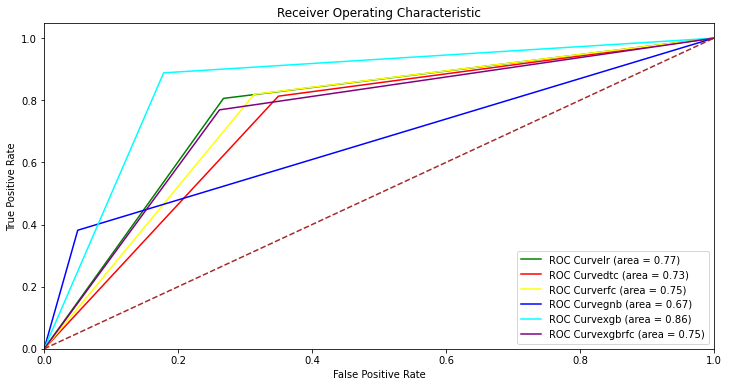

In [95]:
plt.figure(figsize = (12,6))
plt.plot(fpr, tpr, color='green', label = "ROC Curvelr (area = %0.2f)" %roc_auc)
plt.plot(fpr1, tpr1, color='red', label = "ROC Curvedtc (area = %0.2f)" %roc_auc1)
plt.plot(fpr2, tpr2, color='yellow', label = "ROC Curverfc (area = %0.2f)" %roc_auc2)
plt.plot(fpr3, tpr3, color='blue', label = "ROC Curvegnb (area = %0.2f)" %roc_auc3)
plt.plot(fpr4, tpr4, color='cyan', label = "ROC Curvexgb (area = %0.2f)" %roc_auc4)
plt.plot(fpr5, tpr5, color='purple', label = "ROC Curvexgbrfc (area = %0.2f)" %roc_auc5)
plt.plot([0,1],[0,1], color='brown', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")

from above we can also confirm that our XGBoost model has the best results as the area under curve score is 86% so we will say that this is our best model lets save it for further use

In [96]:
joblib.dump(gscvxgb.best_estimator_,'MicroCreditLoan.pkl')

['MicroCreditLoan.pkl']

###  We saved this model as our best because we got total area under all performance as 86%

lets see the Predicted and Actual Values 

In [97]:
Eval = {
    'True Values':Y_test,
    'Predicted Values':predxgb
}

In [98]:
values = pd.DataFrame.from_dict(Eval)

In [99]:
values

True Values  Predicted Values
15549             1                 1
151950            1                 1
178454            1                 1
127734            1                 1
99189             1                 1
...             ...               ...
46583             1                 1
35546             1                 1
169289            1                 1
76982             1                 1
33459             1                 1

[46111 rows x 2 columns]

from above we can see the actual values and the predicted values

## By using MicroCredictLoan.pkl we can predict another Micro Credict Loan dataset if they have same number of features. 